<a href="https://colab.research.google.com/github/juancruzalbornoz/Proyecto_DS_III-Analisis_Sentimientos_Peliculas_NLP/blob/main/Entrega_Final_Data_Science_III_NLP_%26_Deep_Learning_aplicado_a_Ciencia_de_Datos_Juan_Cruz_Albornoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DE SENTIMIENTOS EN RESEÑAS DE PELÍCULAS**
**Entrega Final - Data Science III: NLP & Deep Learning aplicado a Ciencia de Datos**

El objetivo de este proyecto es construir un modelo capaz de clasificar automáticamente el sentimiento (positivo o negativo) de reseñas de películas. Este tipo de análisis es una herramienta estratégica para **productoras, plataformas de streaming y agencias de marketing**, ya que permite medir la percepción del público y guiar decisiones en áreas como **inteligencia de audiencias y sistemas de recomendación**.

Para lograrlo, se desarrolla un pipeline completo que abarca:

> 1.  **El preprocesamiento avanzado del texto** con herramientas como **NLTK** y **spaCy** para transformar las reseñas en datos de alta calidad.
> 2.  **La construcción y evaluación comparativa de tres modelos** de complejidad creciente, utilizando **Keras/TensorFlow**:
>     *   Un **modelo baseline** clásico (Regresión Logística con TF-IDF).
>     *   Una **Red Neuronal Multicapa (MLP)** para capturar relaciones no lineales.
>     *   Una **Red Neuronal Recurrente (LSTM)**, diseñada para interpretar el orden y el contexto de las palabras.
> 3.  **Un análisis riguroso de las métricas de rendimiento** para determinar qué arquitectura es más efectiva y si la complejidad de los modelos de Deep Learning se justifica con una mejora tangible.

Este notebook presenta el desarrollo completo, desde la obtención y preparación del dataset hasta la implementación y la comparación final de los modelos. El código es totalmente reproducible y busca demostrar un flujo de trabajo de NLP de principio a fin, con valor tanto académico como profesional.

## **1. INTRODUCCIÓN**

En la era de la información, los usuarios generan cantidades masivas de datos textuales al expresar sus opiniones en línea. En el caso del **mercado cinematográfico**, las reseñas y comentarios de los espectadores se han convertido en una fuente clave de retroalimentación para **productoras, distribuidoras y plataformas de streaming**. Estas opiniones permiten evaluar tanto la recepción de una película como la satisfacción del espectador en aspectos como el guion, las actuaciones, la dirección o la calidad visual.

El análisis de estas reseñas representa una gran oportunidad para aplicar técnicas de **Procesamiento de Lenguaje Natural (NLP)**, combinadas con modelos de **Deep Learning**, que permitan clasificar automáticamente el contenido textual según el sentimiento expresado: **positivo o negativo**. Este tipo de clasificación no solo ofrece valor informativo, sino que puede utilizarse para la automatización de tareas como la moderación de contenido, el monitoreo de la reputación de un estreno o la mejora de sistemas de recomendación.

Este trabajo se enmarca dentro del curso Data Science III y propone el desarrollo completo de un pipeline de análisis de sentimientos, combinando herramientas como **NLTK, spaCy y Keras/TensorFlow**, para entrenar y evaluar diferentes arquitecturas de redes neuronales.

---
### **1.1 MOTIVACIÓN**

En el contexto actual, donde las decisiones de los espectadores sobre qué ver están cada vez más influenciadas por las opiniones de otros, el análisis de sentimientos automatizado ofrece una solución eficiente y escalable para la industria del entretenimiento.

Profesionalmente, este proyecto representa una instancia aplicable de NLP, una de las ramas más dinámicas y prometedoras dentro del campo de la Ciencia de Datos. La posibilidad de desarrollar una solución concreta y funcional a partir de reseñas reales permite no solo consolidar los contenidos del curso, sino también preparar un portafolio sólido para oportunidades laborales futuras.

---
### **1.2 AUDIENCIA**

Este trabajo está dirigido a:

> 1.  **Productoras de cine y estudios**, que deseen monitorear la percepción del público sobre sus películas.
> 2.  **Plataformas de streaming (Netflix, HBO, etc.)**, que puedan utilizar estos modelos para clasificar reseñas automáticamente y mejorar sus recomendaciones.
> 3.  **Analistas de datos y equipos de marketing**, interesados en obtener insights a partir de texto no estructurado para guiar sus campañas publicitarias.
> 4.  **Profesores y compañeros del curso**, como parte de la evaluación académica del proyecto final.

---
### **1.3 PREGUNTAS GENERALES QUE ESTE TRABAJO PRETENDE RESPONDER**

> 1.  **¿Cuál es la proporción de reseñas positivas y negativas en el dataset?**
>     Este análisis permitirá identificar si existe un desbalance de clases y qué tipo de opiniones predominan en la percepción general de las películas.

> 2.  **¿Cuál es la distribución de la longitud de las reseñas?**
>     Conocer esta distribución es crucial para definir parámetros técnicos en nuestros modelos, como la longitud máxima de las secuencias de texto.

> 3.  **¿Qué tipo de palabras o expresiones aparecen con mayor frecuencia en cada tipo de sentimiento?**
>     Mediante técnicas de NLP se buscará identificar los términos clave y patrones lingüísticos que caracterizan a las críticas positivas y negativas.

---
### **1.4 ENFOQUE DETALLADO Y PREGUNTAS PARTICULARES A RESPONDER**

> 1.  **¿Qué tan efectivos son los diferentes modelos (desde un baseline simple hasta un MLP y una LSTM) para predecir el sentimiento de una reseña?**
>     Se evaluará la precisión de cada modelo en base a distintas métricas (accuracy, precision, recall, F1-score) y se compararán sus resultados.

> 2.  **¿Qué impacto tiene el preprocesamiento avanzado del texto en la calidad de los datos?**
>     Se contrastará el uso de técnicas de limpieza simples (con NLTK) frente a métodos más robustos como la **lematización con spaCy**, demostrando visualmente por qué este proceso es necesario.

> 3.  **¿Aporta un valor real una arquitectura de red más compleja (LSTM), que entiende el orden de las palabras, frente a una más simple (MLP)?**
>     Se analizará si la capacidad de la LSTM para manejar secuencias se traduce en una mejora tangible en el rendimiento de la clasificación.

## **2. OBJETIVOS Y PROBLEMA COMERCIAL**

### **2.1 CONTEXTO COMERCIAL**

En la **industria cinematográfica y del entretenimiento**, las opiniones de los espectadores juegan un papel clave en el éxito de una producción. Las reseñas publicadas en sitios web como Rotten Tomatoes, IMDb, foros y redes sociales reflejan directamente la experiencia de la audiencia. Estas opiniones abarcan desde aspectos técnicos como la cinematografía, hasta elementos subjetivos como la calidad del guion, las actuaciones o el impacto emocional de la película.

Este trabajo tiene como propósito central aplicar técnicas de **Procesamiento de Lenguaje Natural (NLP)** y **Deep Learning** para el análisis de estas reseñas, con el objetivo de **clasificar automáticamente el sentimiento expresado en cada una** (positivo o negativo).

Concretamente, los objetivos son:

> 1.  **Clasificación automática de sentimientos:** Desarrollar un modelo capaz de determinar el sentimiento general de una reseña de película, basándose únicamente en su contenido textual.

> 2.  **Limpieza y preprocesamiento de datos textuales:** Aplicar un pipeline completo de técnicas de normalización, tokenización, eliminación de stopwords y lematización para transformar el texto crudo en datos de alta calidad aptos para el análisis.

> 3.  **Entrenamiento y comparación de modelos de Deep Learning:** Construir, entrenar y evaluar diferentes arquitecturas de redes neuronales (MLP y LSTM) utilizando Keras/TensorFlow, para determinar cuál es más efectiva para esta tarea.

> 4.  **Identificación de patrones de lenguaje:** Detectar las palabras y expresiones más frecuentes y características dentro de cada clase de sentimiento (positivo vs. negativo) a través de visualizaciones.

> 5.  **Análisis comparativo de arquitecturas:** Evaluar cómo mejora el rendimiento al pasar de un modelo simple a una arquitectura de red neuronal recurrente que considera el orden secuencial del texto.

---
### **2.2 PROBLEMA COMERCIAL**

En un contexto donde la reputación digital de una película ("el boca a boca online") puede impactar fuertemente en la taquilla y en las suscripciones a plataformas de streaming, contar con herramientas automáticas de análisis de opiniones se vuelve estratégico.

Este proyecto aborda el siguiente problema comercial:

**¿Cómo puede una empresa de la industria del entretenimiento (productora, distribuidora o plataforma de streaming) entender de forma automatizada y a gran escala la percepción del público sobre sus contenidos, a partir del análisis de miles de reseñas textuales?**

Resolver este problema permite a estas empresas:

> *   **Medir el pulso de la audiencia** y detectar éxitos o fracasos de forma temprana.
> *   Identificar los **puntos fuertes o débiles** de una película (guion, actuaciones, dirección) según la percepción de los espectadores.
> *   **Responder rápidamente** ante una tendencia negativa en la recepción de un estreno.
> *   **Clasificar miles de opiniones** sin intervención humana, ganando tiempo y eficiencia para mejorar sistemas de recomendación o generar reportes de marketing.

Además, desde el punto de vista de proyectos de ciencia de datos, este problema permite aplicar integralmente los contenidos del curso (EDA, NLP, vectorización, modelado con redes neuronales, métricas de evaluación), constituyendo una experiencia formativa completa con alto valor profesional.

## **3. DISPONIBILIDAD Y ESTRUCTURA DE LOS DATOS**

En esta sección se describe el origen del conjunto de datos, su estructura, la forma en que se accede a él y las variables que se utilizarán a lo largo del proyecto.

---
### 3.1 Fuente y Descripción del Dataset

El conjunto de datos utilizado en este trabajo proviene del repositorio público de Kaggle. Fue seleccionado por su gran volumen, la riqueza de sus metadatos y la claridad de sus etiquetas de sentimiento, lo que lo convierte en un recurso ideal para este proyecto.

*   **Nombre del Dataset:** **Rotten Tomatoes Movies and Critic Reviews Dataset**
*   **Fuente Original:**
    🔗 [https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset)

El archivo principal, `rotten_tomatoes_critic_reviews.csv`, contiene más de 1.1 millones de reseñas de críticos de cine. Aunque el dataset es muy completo, para el objetivo central de este proyecto —**clasificar el sentimiento basándose en el texto**—, nos enfocaremos en las dos columnas más importantes: **`review_content`** y **`review_type`**.

---
### 3.2 Forma de Acceso y Carga de Datos

Para garantizar la **máxima reproducibilidad y portabilidad** de este proyecto, se ha optado por alojar el dataset en un repositorio público de **GitHub**. Este enfoque evita la necesidad de descargas manuales o la configuración de APIs por parte del usuario final.

**El procedimiento para manejar el archivo grande (aprox. 150 MB) fue el siguiente:**

> 1.  Se creó un repositorio en GitHub para alojar el proyecto.
> 2.  Se utilizó la extensión **Git LFS (Large File Storage)** para subir el archivo `.csv` al repositorio.
> 3.  Dentro del notebook de Colab, se utiliza la URL de descarga directa ("raw") del archivo para cargarlo en un DataFrame de Pandas, haciendo el notebook completamente **autocontenido y funcional**.

---
### 3.3 Formato y Estructura Inicial del Dataset

La estructura efectiva con la que trabajaremos es sencilla pero potente, ideal para tareas de NLP. A continuación, se muestra una representación simplificada de las columnas de interés:

| review_content | review_type |
| :--- | :--- |
| "A good film that manages to be both funny and poignant." | Fresh |
| "The plot is a chaotic mess from start to finish." | Rotten |

*   **`review_content`**: Contiene el texto completo de la crítica, escrito en inglés.
*   **`review_type`**: Proporciona la etiqueta de sentimiento binaria, "Fresh" (positivo) o "Rotten" (negativo).

---
### 3.4 Definición de Variables (Originales y Derivadas)

A partir de los datos originales, se generan las siguientes variables clave para nuestro flujo de trabajo:

#### **Variables de Interés (del dataset original):**
> *   `review_content` (texto): Contenido textual de la reseña. Será nuestra **característica de entrada (X)**.
> *   `review_type` (categórica): Etiqueta "Fresh" o "Rotten". Será nuestra **etiqueta objetivo (y)**.

#### **Variables Derivadas (creadas en este proyecto):**
> *   **`review_es` y `sentimiento` (estandarizadas):** Nombres consistentes que le daremos a las columnas `review_content` y `review_type` en nuestro DataFrame de trabajo.
> *   **`review_lemmatized` (lista de tokens):** La versión final y procesada del texto, que servirá como entrada principal para nuestros modelos.
> *   **Representaciones Numéricas (Vectores):** Transformaciones del texto a un formato numérico, que incluirán una **Matriz TF-IDF** (para los modelos baseline) y **Secuencias Rellenadas** (para el modelo LSTM).

La definición clara de estas variables asegura coherencia y proporciona una hoja de ruta para las etapas posteriores del proyecto.

## **4. CONFIGURACIÓN DEL ENTORNO Y CARGA DE DATOS**

Esta sección se encarga de toda la configuración inicial del proyecto. El flujo de trabajo está dividido en dos partes para garantizar una correcta instalación y carga de las dependencias:

1.  **Instalación:** La primera celda de código instala todas las librerías externas y descarga los modelos de lenguaje necesarios. **Después de ejecutarla, se debe reiniciar el entorno.**
2.  **Importación y Carga:** La segunda celda importa las librerías ya instaladas y carga nuestro dataset directamente desde el repositorio de GitHub.

### 4.1 Instalación de Librerías y Modelos

In [1]:
# --- 4.1.1: INSTALACIÓN DE LIBRERÍAS EXTERNAS ---
print("Instalando librerías necesarias...")
!pip install -q unidecode
!pip install -q transformers
!pip install -q datasets
!pip install -q spacy

# --- 4.1.2: DESCARGA DE MODELOS DE LENGUAJE ---
print("\nDescargando modelo de lenguaje en inglés para spaCy...")
!python -m spacy download en_core_web_sm

# --- 4.1.3: MENSAJE DE REINICIO ---
print("\n" + "="*60)
print("--- ¡INSTALACIÓN COMPLETA! ---")
print("--- AHORA, POR FAVOR, REINICIA LA SESIÓN DE EJECUCIÓN ---")
print("--- Menú -> Entorno de ejecución -> Reiniciar sesión ---")
print("="*60)

Instalando librerías necesarias...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.3 MB/s eta 0:00:00

Descargando modelo de lenguaje en inglés para spaCy...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

--- ¡INSTALACIÓN COMPLETA! ---
--- AHORA, POR FAVOR, REINICIA LA SESIÓN DE EJECUCIÓN ---
--- Menú -> Entorno de ejecución -> Reiniciar sesión ---


### 4.2 Importación de Librerías y Carga del Dataset

In [2]:
# --- 4.2.1: IMPORTACIÓN DE LIBRERÍAS ---
print("Importando librerías...")
import pandas as pd
import numpy as np
import re
import warnings
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from unidecode import unidecode
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertForSequenceClassification
print("Librerías importadas correctamente.")
# Descargamos los recursos de NLTK que se usarán más adelante
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)


# --- 4.2.2: CARGA Y ADAPTACIÓN DEL DATASET DESDE GITHUB ---
# Asegúrate de que esta es tu URL de descarga directa correcta
file_url = 'https://media.githubusercontent.com/media/juancruzalbornoz/Proyecto_DS_III-Analisis_Sentimientos_Peliculas_NLP/main/rotten_tomatoes_critic_reviews.csv'

try:
    print(f"\nCargando dataset desde la URL pública...")
    df_original = pd.read_csv(file_url)

    print("\nAdaptando el DataFrame para el proyecto...")
    df = df_original[['review_content', 'review_type']].copy()
    df = df.rename(columns={'review_content': 'review_es', 'review_type': 'sentimiento'})
    df['sentimiento'] = df['sentimiento'].map({'Fresh': 'positivo', 'Rotten': 'negativo'})
    df.dropna(inplace=True)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("\n" + "="*50)
    print("--- ¡CONFIGURACIÓN COMPLETADA CON ÉXITO! ---")
    print(f"Total de reseñas a utilizar: {len(df)}")
    print("\nPrimeras 5 filas del DataFrame final:")
    display(df.head())
    print("="*50)

except Exception as e:
    print(f"\n--- ¡ERROR! ---")
    print(f"He detectado un error al cargar tu archivo desde la URL de GitHub LFS:")
    print(f"Error específico: {e}\n")
    print("Posibles Soluciones:")
    print("1. Verifica que la URL en la variable 'file_url' sea la correcta (obtenida con clic derecho en 'Download').")
    print("2. Asegúrate de que tu repositorio de GitHub sea PÚBLICO y la rama principal se llame 'main'.")

Importando librerías...
Librerías importadas correctamente.

Cargando dataset desde la URL pública...

Adaptando el DataFrame para el proyecto...

--- ¡CONFIGURACIÓN COMPLETADA CON ÉXITO! ---
Total de reseñas a utilizar: 1064211

Primeras 5 filas del DataFrame final:


,review_es,sentimiento
0,"It's predictable stuff for the most part, and ...",positivo
1,Though the film defines Paul's life by his rel...,negativo
2,"Just as with Suicide Club, the deliberate weir...",positivo
3,"""Bad Boys"" misses its chance at greatness, but...",positivo
4,"Creepy, bloody, and flat-out weird in places, ...",positivo


### **4.3 Preprocesamiento de Texto (NLP)**

Esta es la etapa fundamental donde transformamos el texto crudo de las reseñas en un formato limpio, estructurado y normalizado que nuestros modelos puedan entender. Un buen preprocesamiento es crucial para el éxito de cualquier proyecto de NLP.

Seguiremos un pipeline de limpieza paso a paso, explicando y ejecutando cada técnica en su propia subsección. Para las tareas más intensivas, como la lematización, utilizaremos métodos optimizados como `nlp.pipe()` para asegurar un procesamiento eficiente de nuestro gran volumen de datos.

**Pasos del Pipeline:**
1.  **Limpieza Básica y Tokenización** (con NLTK).
2.  **Lematización Optimizada** (con `spaCy`).
3.  **Análisis de Frecuencia** de las palabras resultantes.

In [3]:
# --- 6.1.1: Carga de modelos y recursos ---
# Importamos tqdm y lo inicializamos para que funcione con Pandas
from tqdm.auto import tqdm
tqdm.pandas()

print("Cargando modelo de lenguaje de spaCy...")
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
print("Modelo de spaCy cargado.")

print("\nDescargando recursos de NLTK (si es necesario)...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
print("Recursos de NLTK listos.")


# --- 6.1.2: Pipeline de Preprocesamiento con Barras de Progreso ---

# PASO 1 y 2: Minúsculas y Limpieza
print("\nPasos 1 y 2: Aplicando minúsculas y limpieza de texto...")
# Usamos .progress_apply() en lugar de .apply() para mostrar una barra
df['review_clean'] = df['review_es'].progress_apply(lambda texto: re.sub(r'[^a-z\s]', '', str(texto).lower()))

# PASO 3 y 4: Tokenización y Eliminación de Stop Words
print("\nPasos 3 y 4: Aplicando tokenización y eliminación de Stop Words...")
stop_words = set(stopwords.words('english'))
# También usamos .progress_apply() aquí
df['review_no_stopwords'] = df['review_clean'].progress_apply(
    lambda texto: [token for token in word_tokenize(texto) if token not in stop_words]
)

# PASO 5: Lematización Optimizada con nlp.pipe() y Barra de Progreso
print("\nPaso 5: Lematizando con nlp.pipe()...")
textos_para_lematizar = [" ".join(tokens) for tokens in df['review_no_stopwords']]
lemmas_list = []
for doc in tqdm(nlp.pipe(textos_para_lematizar, batch_size=500), total=len(textos_para_lematizar), desc="Lematizando"):
    lemmas_list.append([token.lemma_ for token in doc])

df['review_lemmatized'] = lemmas_list

print("\n¡Pipeline de preprocesamiento con barras de progreso completado!")

# --- 6.1.3: Visualización de los resultados ---
print("\nVisualizando el resultado del pipeline (primeras 5 filas):")
columnas_a_mostrar = ['review_es', 'review_clean', 'review_no_stopwords', 'review_lemmatized']
display(df[columnas_a_mostrar].head())

Cargando modelo de lenguaje de spaCy...
Modelo de spaCy cargado.

Descargando recursos de NLTK (si es necesario)...
Recursos de NLTK listos.

Pasos 1 y 2: Aplicando minúsculas y limpieza de texto...


  0%|          | 0/1064211 [00:00<?, ?it/s]


Pasos 3 y 4: Aplicando tokenización y eliminación de Stop Words...


  0%|          | 0/1064211 [00:00<?, ?it/s]


Paso 5: Lematizando con nlp.pipe()...


Lematizando:   0%|          | 0/1064211 [00:00<?, ?it/s]


¡Pipeline de preprocesamiento con barras de progreso completado!

Visualizando el resultado del pipeline (primeras 5 filas):


,review_es,review_clean,review_no_stopwords,review_lemmatized
0,"It's predictable stuff for the most part, and ...",its predictable stuff for the most part and th...,"[predictable, stuff, part, jokes, thin, half, ...","[predictable, stuff, part, joke, thin, half, w..."
1,Though the film defines Paul's life by his rel...,though the film defines pauls life by his rela...,"[though, film, defines, pauls, life, relations...","[though, film, define, pauls, life, relationsh..."
2,"Just as with Suicide Club, the deliberate weir...",just as with suicide club the deliberate weird...,"[suicide, club, deliberate, weirdness, detache...","[suicide, club, deliberate, weirdness, detach,..."
3,"""Bad Boys"" misses its chance at greatness, but...",bad boys misses its chance at greatness but it...,"[bad, boys, misses, chance, greatness, saying,...","[bad, boy, miss, chance, greatness, say, somet..."
4,"Creepy, bloody, and flat-out weird in places, ...",creepy bloody and flatout weird in places amul...,"[creepy, bloody, flatout, weird, places, amule...","[creepy, bloody, flatout, weird, place, amulet..."


### 4.4 Análisis de Frecuencia

Finalmente, después de todo el preprocesamiento, podemos analizar qué palabras son las más comunes en nuestro corpus. Realizaremos este análisis sobre la columna **lematizada**, ya que es la representación más limpia y semánticamente correcta de nuestro texto. Esto nos dará una idea de los temas principales en las reseñas de películas.

Analizando la frecuencia de palabras en el texto original...


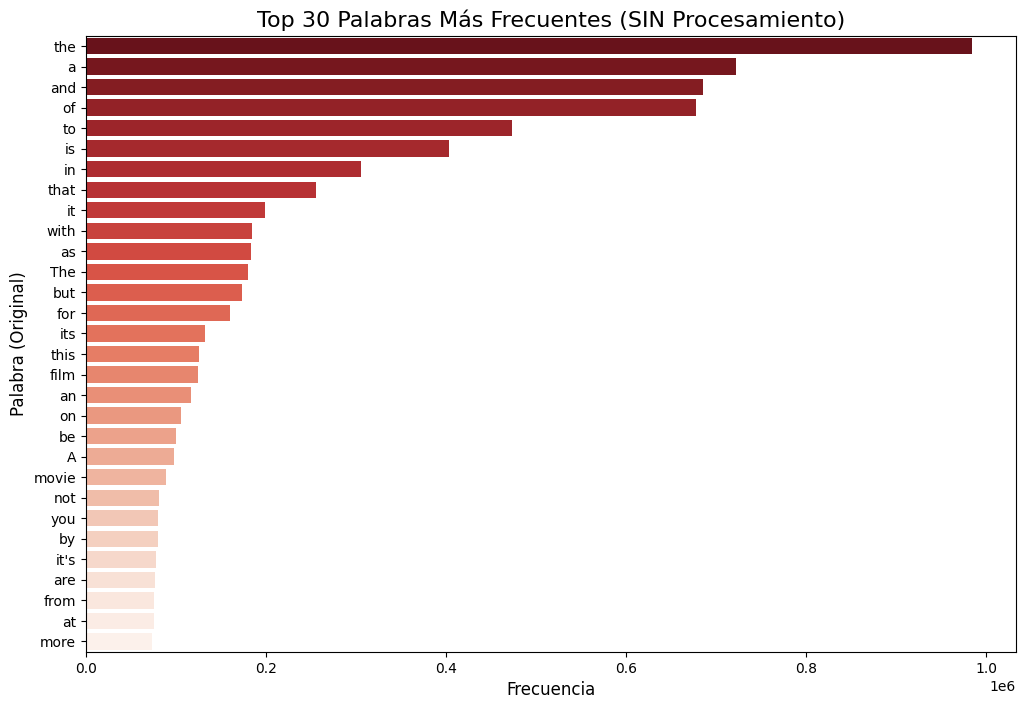


Analizando la frecuencia de palabras en el texto procesado...


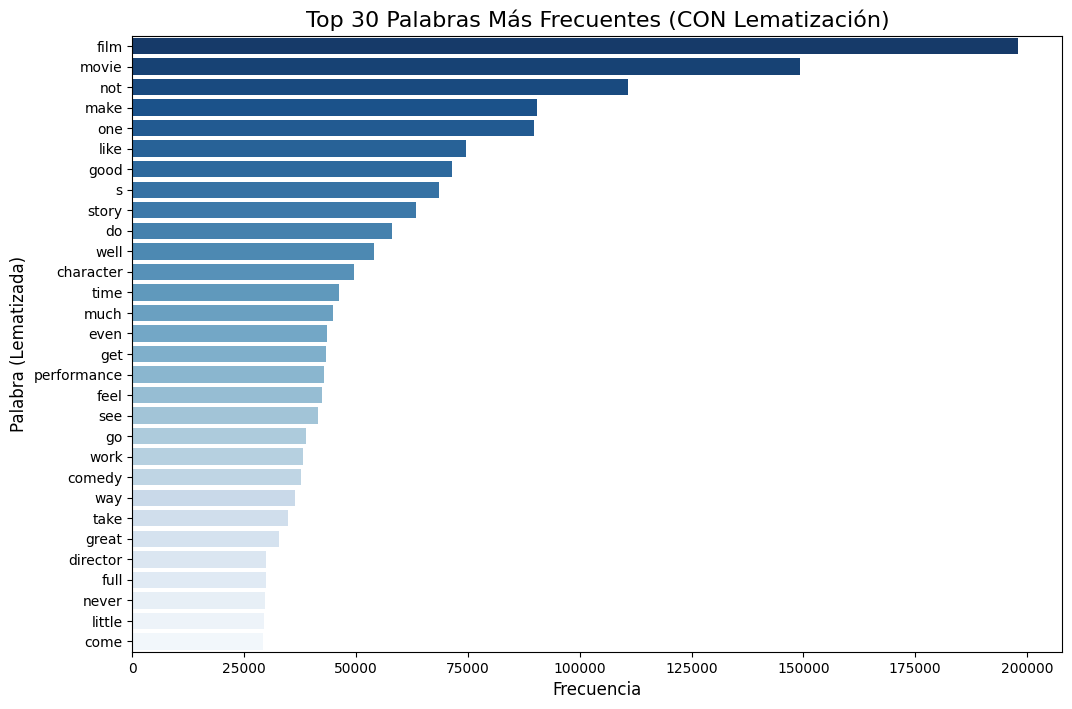

In [4]:
#### **Bloque 1: Frecuencia SIN Procesamiento**
from collections import Counter
import warnings

# --- ANÁLISIS DE FRECUENCIA DEL TEXTO ORIGINAL (SIN PROCESAR) ---

print("Analizando la frecuencia de palabras en el texto original...")
# Tomamos la columna original 'review_es', la convertimos a string y la dividimos por espacios.
# Esto nos dará una idea del texto en su estado más "crudo".
tokens_originales = [token for review in df['review_es'] for token in str(review).split()]

# Contamos la frecuencia
frecuencia_original = Counter(tokens_originales)

# Obtenemos las 30 palabras más comunes
palabras_comunes_original = frecuencia_original.most_common(30)
df_frecuencia_original = pd.DataFrame(palabras_comunes_original, columns=['Palabra', 'Frecuencia'])

# --- Visualización del Gráfico ---
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 8))
# Usamos una paleta de rojos para indicar que estos son datos "crudos" o "ruidosos".
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencia_original, palette='Reds_r')
plt.title('Top 30 Palabras Más Frecuentes (SIN Procesamiento)', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabra (Original)', fontsize=12)
plt.show()

#### Bloque 2: Frecuencia CON Procesamiento (El que ya teníamos)
# --- ANÁLISIS DE FRECUENCIA DEL TEXTO PROCESADO Y LEMATIZADO ---

print("\nAnalizando la frecuencia de palabras en el texto procesado...")
# Ahora usamos nuestra columna final 'review_lemmatized'.
todos_los_tokens = [token for sublist in df['review_lemmatized'] for token in sublist]

# Contamos la frecuencia
frecuencia_procesada = Counter(todos_los_tokens)

# Obtenemos las 30 palabras más comunes
palabras_comunes_procesadas = frecuencia_procesada.most_common(30)
df_frecuencia_procesada = pd.DataFrame(palabras_comunes_procesadas, columns=['Palabra', 'Frecuencia'])

# --- Visualización del Gráfico ---
plt.figure(figsize=(12, 8))
# Usamos la paleta de azules para indicar que estos son datos "limpios".
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencia_procesada, palette='Blues_r')
plt.title('Top 30 Palabras Más Frecuentes (CON Lematización)', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabra (Lematizada)', fontsize=12)
plt.show()

warnings.simplefilter(action='default', category=FutureWarning)

### **4.5 Análisis Lingüístico Preliminar**

Antes de sumergirnos en el preprocesamiento intensivo y el modelado, realizaremos un análisis lingüístico preliminar utilizando herramientas de alto nivel. Esto nos dará insights rápidos sobre la naturaleza semántica y estructural de nuestras reseñas.

1.  **Análisis de Sentimiento con `TextBlob`:** Usaremos esta librería para calcular la **polaridad** (qué tan positiva o negativa es una reseña, en una escala de -1 a 1) y la **subjetividad** (qué tan basada en opiniones vs. hechos está una reseña, en una escala de 0 a 1) de nuestro texto.

2.  **Reconocimiento de Entidades Nombradas (NER) con `spaCy`:** Aplicaremos NER para identificar y clasificar automáticamente entidades como nombres de actores, directores (PERSON), estudios de cine (ORG), o países (GPE) mencionados en las críticas.

Aplicando TextBlob para calcular polaridad y subjetividad...

Calculando Polaridad:


  0%|          | 0/1064211 [00:00<?, ?it/s]


Calculando Subjetividad:


  0%|          | 0/1064211 [00:00<?, ?it/s]


Cálculo completado.


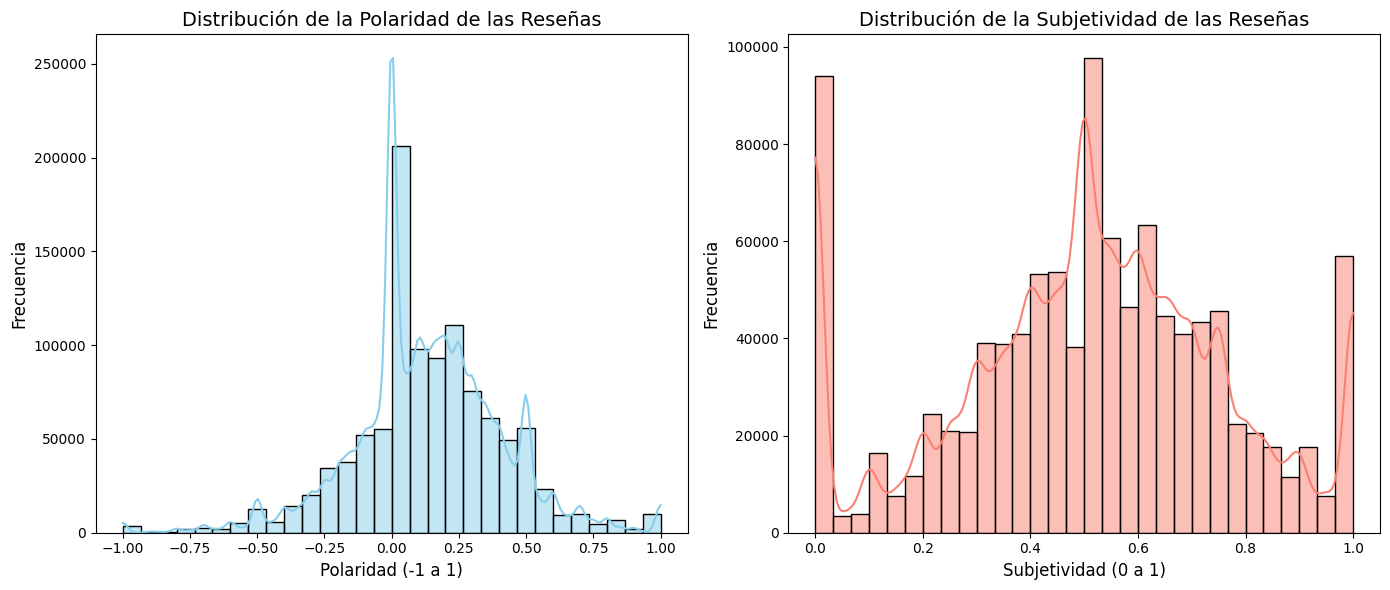

In [5]:
# --- 1.5.1: Análisis de Polaridad y Subjetividad con TextBlob ---

# Instalamos TextBlob si no está presente (este comando no hace nada si ya está instalado)
!pip install -q textblob

from textblob import TextBlob
from tqdm.auto import tqdm # Importamos tqdm
tqdm.pandas() # Inicializamos la integración con Pandas

print("Aplicando TextBlob para calcular polaridad y subjetividad...")

# Definimos las funciones (sin cambios)
def get_polarity(texto):
    return TextBlob(str(texto)).sentiment.polarity

def get_subjectivity(texto):
    return TextBlob(str(texto)).sentiment.subjectivity


# --- ¡LA MEJORA ESTÁ AQUÍ! ---
# Aplicamos las funciones a la columna de reseñas originales usando .progress_apply()

# Barra de progreso para la Polaridad
print("\nCalculando Polaridad:")
df['polaridad'] = df['review_es'].progress_apply(get_polarity)

# Barra de progreso para la Subjetividad
print("\nCalculando Subjetividad:")
df['subjetividad'] = df['review_es'].progress_apply(get_subjectivity)

print("\nCálculo completado.")


# --- Visualización de las distribuciones (sin cambios) ---
plt.figure(figsize=(14, 6))

# Gráfico para la Polaridad
plt.subplot(1, 2, 1)
sns.histplot(df['polaridad'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de la Polaridad de las Reseñas', fontsize=14)
plt.xlabel('Polaridad (-1 a 1)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Gráfico para la Subjetividad
plt.subplot(1, 2, 2)
sns.histplot(df['subjetividad'], kde=True, bins=30, color='salmon')
plt.title('Distribución de la Subjetividad de las Reseñas', fontsize=14)
plt.xlabel('Subjetividad (0 a 1)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()

**Interpretación de `TextBlob`:**

Los gráficos de distribución de polaridad y subjetividad calculados por `TextBlob` nos ofrecen insights muy interesantes sobre la naturaleza lingüística de las reseñas.

*   **Gráfico de Polaridad (Izquierda):**
    *   La distribución está **fuertemente sesgada hacia lo positivo**. Vemos un pico masivo alrededor de una polaridad de **+0.1 a +0.25**, lo que indica que una gran cantidad de reseñas contienen un lenguaje ligeramente positivo.
    *   No observamos una distribución "bimodal" perfecta (con dos picos simétricos en negativo y positivo). En cambio, hay un gran cúmulo en el lado positivo y una "cola" mucho más dispersa y menos pronunciada en el lado negativo.
    *   El pico más alto, justo por encima de 0.0, corresponde a reseñas que `TextBlob` considera **objetivas o neutras en polaridad**, a pesar de que en nuestro dataset están etiquetadas como positivas o negativas. Esto evidencia las limitaciones de un análisis basado en léxico, que puede no capturar el sentimiento sutil.

*   **Gráfico de Subjetividad (Derecha):**
    *   La distribución es fascinante. Vemos **dos picos muy claros**: uno masivo en **0.0** (objetividad total) y otro pico muy alto en **1.0** (subjetividad total).
    *   **Pico en 0.0:** Este pico tan grande en objetividad es inesperado. Sugiere que `TextBlob` considera que una gran cantidad de reseñas están escritas de forma muy fáctica, a pesar de ser críticas de cine. Esto podría deberse a reseñas muy cortas que solo describen la película sin usar adjetivos de opinión que `TextBlob` reconozca.
    *   **Pico en 1.0:** Este pico confirma que también hay una gran cantidad de reseñas que son puramente de opinión, como es de esperar.
    *   Entre estos dos extremos, vemos una distribución más repartida, con un valle alrededor de 0.1-0.2.

**Conclusión del Análisis:**
`TextBlob` nos muestra que, si bien hay una tendencia general hacia el lenguaje positivo, el corpus es complejo. La presencia de un pico tan grande de objetividad (subjetividad = 0.0) y polaridad neutra (polaridad ≈ 0.0) sugiere que muchas reseñas utilizan un lenguaje sutil o descriptivo que una herramienta simple basada en diccionarios no logra capturar por completo. Esto **refuerza la necesidad de utilizar modelos de Deep Learning más avanzados (como LSTM)**, que puedan aprender el sentimiento a partir del contexto y la secuencia de palabras, en lugar de depender únicamente de palabras clave predefinidas.

Recargando modelo de spaCy con el componente NER activado...
Modelo cargado.

Procesando 50000 reseñas con spaCy para NER...


Analizando Entidades (NER):   0%|          | 0/50000 [00:00<?, ?it/s]


Procesamiento NER completado.


/tmp/ipython-input-800162629.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Tipo de Entidad', data=df_entidades, palette='rocket_r')


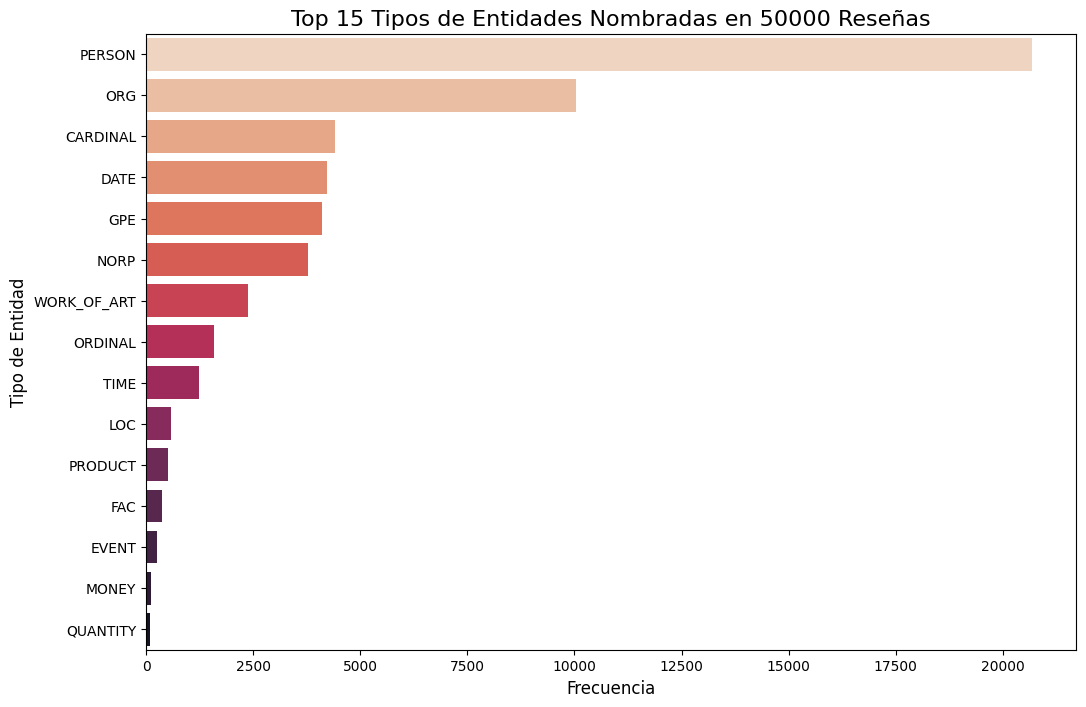

In [6]:
# --- 1.5.2: Reconocimiento de Entidades Nombradas (NER) con spaCy ---
from collections import Counter
from tqdm.auto import tqdm # Importamos tqdm

# Recargamos el modelo de spaCy con el componente NER activado
print("Recargando modelo de spaCy con el componente NER activado...")
nlp_ner = spacy.load('en_core_web_sm')
print("Modelo cargado.")

# Definimos el tamaño de la muestra
SAMPLE_SIZE = 50000
text_sample = df['review_es'].sample(n=SAMPLE_SIZE, random_state=42).tolist()

print(f"\nProcesando {SAMPLE_SIZE} reseñas con spaCy para NER...")

# --- ¡LA MEJORA ESTÁ AQUÍ! ---
entidades = []
# Envolvemos nlp.pipe() con tqdm para crear la barra de progreso
for doc in tqdm(nlp_ner.pipe(text_sample, batch_size=50), total=SAMPLE_SIZE, desc="Analizando Entidades (NER)"):
    entidades.extend([ent.label_ for ent in doc.ents])
# -----------------------------

print("\nProcesamiento NER completado.")

# Contamos la frecuencia de cada tipo de entidad
frecuencia_entidades = Counter(entidades)
df_entidades = pd.DataFrame(frecuencia_entidades.most_common(15), columns=['Tipo de Entidad', 'Frecuencia'])

# --- Visualización de las Entidades ---
plt.figure(figsize=(12, 8))
# Cambiamos la paleta para que sea diferente de los otros gráficos
sns.barplot(x='Frecuencia', y='Tipo de Entidad', data=df_entidades, palette='rocket_r')
plt.title(f'Top 15 Tipos de Entidades Nombradas en {SAMPLE_SIZE} Reseñas', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de Entidad', fontsize=12)
plt.show()

## **5. ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

### 5.1 Objetivo de esta sección
El Análisis Exploratorio de Datos (EDA) es un paso fundamental para familiarizarnos con el dataset. Su objetivo es:

*   **Explorar y entender la estructura** y distribución de los datos.
*   **Identificar patrones,** distribuciones y posibles sesgos en las variables.
*   **Guiar las decisiones** que tomaremos en las fases de preprocesamiento y modelado.

En esta sección, analizaremos la distribución de las etiquetas de sentimiento, la longitud de las reseñas y la evolución temporal de las críticas.

### 5.2 Distribución Temporal de las Reseñas
¿Por qué analizar esto?
Aunque no tenemos el "año de la película", sí tenemos la fecha de publicación de cada reseña (review_date). Analizar esta distribución nos permite entender cómo ha evolucionado el volumen de críticas a lo largo del tiempo. Esto puede revelar tendencias en la industria de la crítica cinematográfica y mostrarnos en qué períodos se concentra la mayor parte de nuestros datos.

DataFrame 'df' encontrado. Procesando la columna de fechas...
Columna de año creada exitosamente.


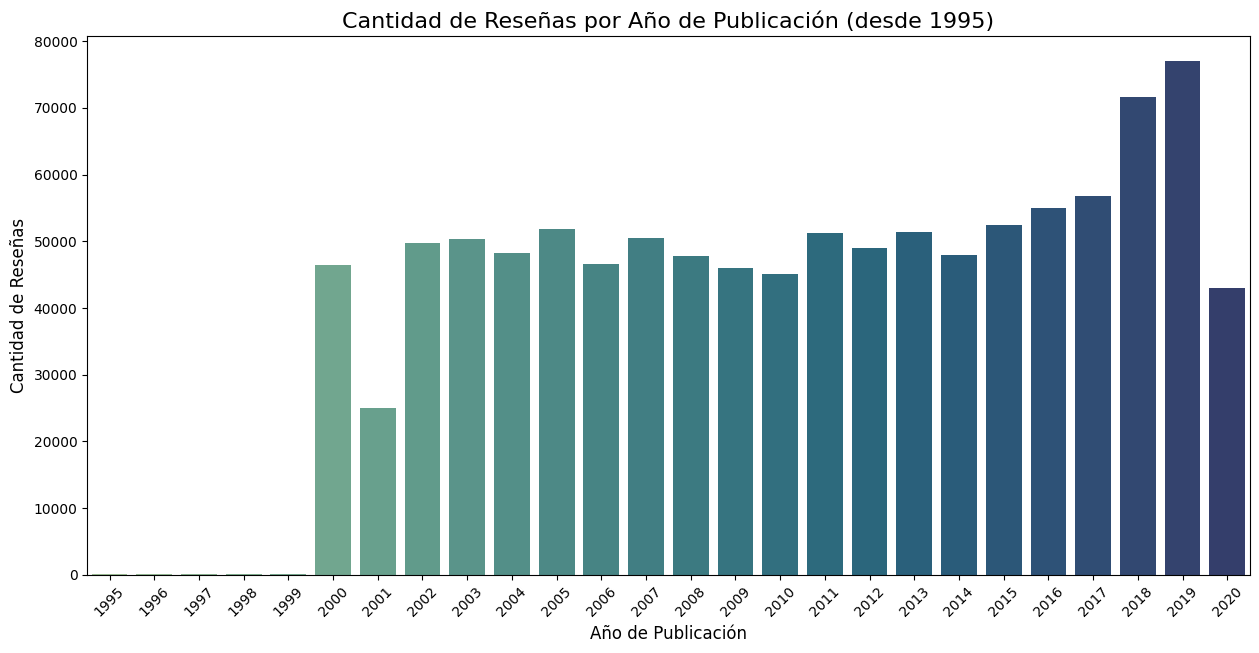

In [7]:
# --- 5.2.1: Verificación y Preprocesamiento de la Fecha ---

# --- ¡LA MEJORA ESTÁ AQUÍ! ---
# Primero, verificamos si el DataFrame 'df' existe.
try:
    _ = df.head(1) # Intentamos acceder a 'df'. Si falla, saltará al 'except'.
    print("DataFrame 'df' encontrado. Procesando la columna de fechas...")
except NameError:
    print("--- ¡ERROR! ---")
    print("El DataFrame 'df' no está definido. Por favor, asegúrate de ejecutar las celdas de la 'Sección 4' (Configuración y Carga de Datos) primero.")
    # Detenemos la ejecución si el DataFrame no existe.
    raise
# -----------------------------

if 'review_year' not in df.columns:
    # Usamos 'df_original' que contiene todas las columnas originales para crear la columna de fecha
    df['review_date_dt'] = pd.to_datetime(df_original['review_date'], errors='coerce')
    df['review_year'] = df['review_date_dt'].dt.year
    df.dropna(subset=['review_year'], inplace=True)
    df['review_year'] = df['review_year'].astype(int)
    print("Columna de año creada exitosamente.")
else:
    print("La columna de año ya existe.")


# --- 5.2.2: Filtrado y Visualización Enfocada ---
año_inicio = 1995
df_filtrado = df[df['review_year'] >= año_inicio].copy()

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df_filtrado, x='review_year', palette='crest') # Cambié la paleta a 'crest' para variar

plt.title(f'Cantidad de Reseñas por Año de Publicación (desde {año_inicio})', fontsize=16)
plt.xlabel('Año de Publicación', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)
plt.xticks(rotation=45)
plt.show()

warnings.simplefilter(action='default', category=FutureWarning)

**Interpretación del Gráfico de Distribución Temporal:**

El gráfico muestra la cantidad de reseñas de películas registradas según su **año de publicación**. Esta distribución temporal está directamente relacionada con el auge y la consolidación de internet como el principal medio para la crítica cinematográfica.

Se observa un **crecimiento exponencial** en el volumen de reseñas a partir de finales de la década de 1990, alcanzando su punto máximo en los años más recientes del dataset (aproximadamente 2017-2020). Los años anteriores a 1995 tienen una presencia prácticamente nula en los datos.

Este detalle es sumamente importante, ya que nos indica que nuestro dataset tiene un **fuerte sesgo hacia el cine y el lenguaje crítico de las últimas dos décadas**. Por lo tanto, los modelos que entrenemos estarán altamente especializados en identificar sentimientos en textos modernos. Su rendimiento podría no ser igual de bueno si se aplicaran a críticas de épocas anteriores (ej. de los años 70 u 80), ya que el estilo de escritura y las referencias culturales serían muy diferentes.

### 5.3 Publicaciones con Mayor Cantidad de Reseñas

**¿Por qué analizar esto?**

Así como en otros datasets se analizan las marcas más frecuentes, en nuestro caso es fundamental entender qué **medios de comunicación o publicaciones (`publisher_name`)** contribuyen con la mayor cantidad de reseñas.

Este análisis nos permite:
*   Ver si el dataset está dominado por las opiniones de unos pocos medios grandes o si hay una diversidad de fuentes.
*   Identificar posibles sesgos en el estilo de escritura, ya que cada publicación puede tener un tono o enfoque particular.
*   Entender qué voces tienen más "peso" en la composición de nuestros datos de entrenamiento.

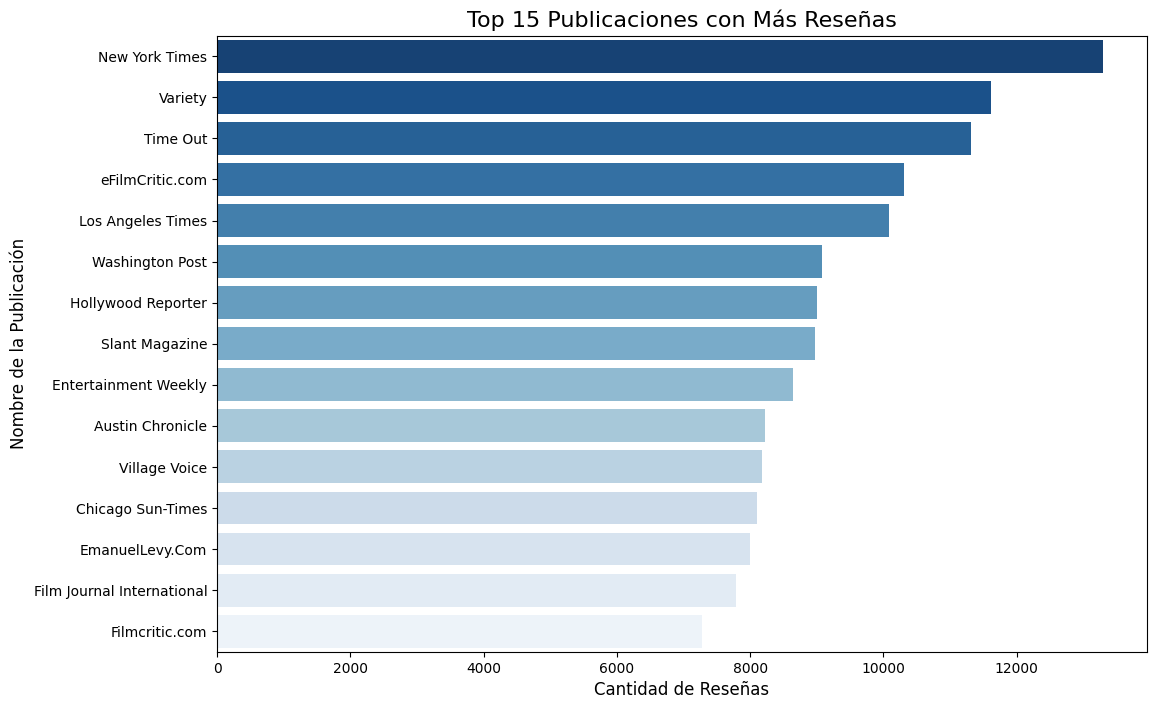

In [8]:
# --- 5.3.1: Conteo de Reseñas por Publicación ---

# Calculamos el conteo de reseñas para cada 'publisher_name'.
# Usamos df_original que contiene todas las columnas.
# .value_counts() cuenta las apariciones de cada valor.
# .head(15) selecciona los 15 más frecuentes.
top_publishers = df_original['publisher_name'].value_counts().head(15)

# --- 5.3.2: Visualización ---
# Ignoramos temporalmente el warning para una salida más limpia
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 8))

# Creamos el gráfico de barras.
ax = sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='Blues_r')

plt.title('Top 15 Publicaciones con Más Reseñas', fontsize=16)
plt.xlabel('Cantidad de Reseñas', fontsize=12)
plt.ylabel('Nombre de la Publicación', fontsize=12)
plt.show()

# Reactivamos las advertencias
warnings.simplefilter(action='default', category=FutureWarning)

**Interpretación del Gráfico:**

En este gráfico se presentan las 15 publicaciones con la mayor cantidad de reseñas dentro de nuestro dataset. Los resultados son muy reveladores y confirman la fuerte influencia de medios de comunicación tradicionales y establecidos en el mundo de la crítica cinematográfica.

Publicaciones de renombre como el **New York Times**, **Variety**, **Time Out** y el **Los Angeles Times** dominan claramente las primeras posiciones, contribuyendo cada una con más de 10,000 reseñas al corpus. A estas les siguen otros medios importantes como el Washington Post y The Hollywood Reporter, junto con plataformas online especializadas como eFilmCritic.com.

Este análisis es crucial por dos motivos:

1.  **Confirma un Sesgo de Fuente:** Si bien el dataset contiene miles de publicaciones, una porción muy significativa de las reseñas proviene de un grupo relativamente pequeño de medios de comunicación de alto perfil, principalmente de Estados Unidos.
2.  **Implicaciones para el Modelo:** Nuestros modelos de NLP aprenderán a identificar sentimientos basándose en gran medida en el **estilo de escritura formal y profesional** característico de estos críticos. El lenguaje utilizado en estos medios es probablemente muy diferente al que se encontraría en foros de internet o redes sociales, lo que significa que nuestro modelo estará altamente especializado en este tipo de discurso.

### 5.4 Verificación y Tratamiento de Valores Nulos

**¿Por qué verificar los valores nulos?**

Antes de proceder con el preprocesamiento, es fundamental identificar y tratar los valores nulos (también conocidos como `NaN` o `Missing Values`). En proyectos de NLP, los valores nulos en la columna de texto (`review_content`) son especialmente problemáticos porque:

*   Las funciones de tokenización, lematización y cualquier otro análisis textual fallarán si intentan procesar un valor nulo, ya que esperan una cadena de texto.
*   Librerías como NLTK y spaCy no están preparadas para manejar valores `NaN` y devolverán errores (a menudo del tipo `'float' object has no attribute 'lower'` o similar).
*   Si se dejaran pasar, contaminarían el entrenamiento de los modelos de machine learning, ya que no aportan ninguna información útil y pueden causar fallos en el proceso.

**¿ELIMINAMOS LOS NULOS, O LOS REEMPLAZAMOS POR UN MARCADOR?**

Antes de eliminar cualquier dato, es crucial cuantificar cuántos valores nulos hay y qué proporción representan del total del dataset. Esto nos permite tomar una decisión informada y justificada.

In [9]:
# --- 5.4.1: Cuantificación de Valores Nulos ---

# Usaremos el DataFrame original (df_original) para este análisis,
# ya que contiene todas las columnas sin procesar.

# Calculamos la cantidad total de nulos por columna
nulos_por_columna = df_original.isnull().sum()

# Calculamos el porcentaje de nulos por columna
porcentaje_nulos = (nulos_por_columna / len(df_original)) * 100

# Creamos un nuevo DataFrame para mostrar los resultados de forma clara
df_nulos = pd.DataFrame({
    'Valores Nulos': nulos_por_columna,
    'Porcentaje (%)': porcentaje_nulos
})

# Filtramos para mostrar solo las columnas que tienen al menos un valor nulo
# y las ordenamos de mayor a menor porcentaje.
df_nulos_filtrado = df_nulos[df_nulos['Valores Nulos'] > 0].sort_values(by='Porcentaje (%)', ascending=False)

print("--- Análisis de Valores Nulos en el Dataset Original ---")
display(df_nulos_filtrado)

--- Análisis de Valores Nulos en el Dataset Original ---


,Valores Nulos,Porcentaje (%)
review_score,305936,27.073575
review_content,65806,5.823452
critic_name,18529,1.639710


**Interpretación y Decisión:**

El análisis cuantitativo de valores nulos revela datos muy importantes sobre la calidad de nuestro dataset original:

*   La columna **`review_score`** es la más afectada, con **305,936** valores faltantes, lo que representa un significativo **27.07%** del total. Esta alta tasa de ausencia confirma que fue una decisión correcta no depender de esta columna para nuestro análisis de sentimiento.
*   Nuestra columna de interés principal, **`review_content`**, presenta **65,806** valores nulos, correspondiendo a un manejable **5.82%** del dataset.
*   La columna **`critic_name`** también tiene una cantidad notable de nulos, con **18,529** valores faltantes (**1.64%**).

Para nuestro proyecto, `review_content` es el insumo central. Aunque podríamos intentar reemplazar sus valores nulos, la mejor estrategia es eliminarlos por las siguientes razones:

*   **Sin valor para el entrenamiento:** Una fila sin texto de reseña es inútil para entrenar un modelo de clasificación de sentimientos basado en texto.
*   **Ruido Artificial:** Reemplazar los nulos con texto genérico (como "sin reseña") introduciría ruido y podría enseñar al modelo patrones incorrectos.
*   **Pérdida Aceptable:** Perder un **5.82%** de los datos es un costo totalmente aceptable para garantizar la **máxima calidad y consistencia** del dataset con el que trabajaremos. Con más de un millón de reseñas completas restantes, el volumen de datos sigue siendo masivo y más que suficiente para construir un modelo robusto.

**Decisión:**
Se ratifica la decisión de **eliminar todas las filas** donde `review_content` o `review_type` tengan un valor nulo. Esta acción ya fue implementada durante la carga y adaptación inicial de los datos (Paso 4.2.2) con el comando `.dropna()`, asegurando que nuestro DataFrame de trabajo (`df`) solo contiene registros completos y válidos, listos para el análisis.

### 5.5 Análisis de la Longitud de las Reseñas

**¿Por qué analizar esto?**

Analizar la distribución de la longitud de las reseñas (medida en cantidad de palabras) es un paso crucial antes del modelado, especialmente cuando planeamos usar redes neuronales como LSTM. Esta información nos permite tomar decisiones informadas sobre:

*   **Parámetros de `padding` y truncamiento:** Las redes neuronales recurrentes requieren que todas las secuencias de entrada tengan la misma longitud. Conocer la distribución nos ayuda a elegir una longitud máxima (`MAX_LENGTH`) que capture la mayor parte de la información sin añadir un exceso de relleno ("padding") innecesario, optimizando así la memoria y el tiempo de entrenamiento.
*   **Entender la naturaleza de los datos:** Nos muestra si las críticas tienden a ser concisas y directas o largas y detalladas, lo que puede influir en la complejidad de los patrones de lenguaje que el modelo necesita aprender.

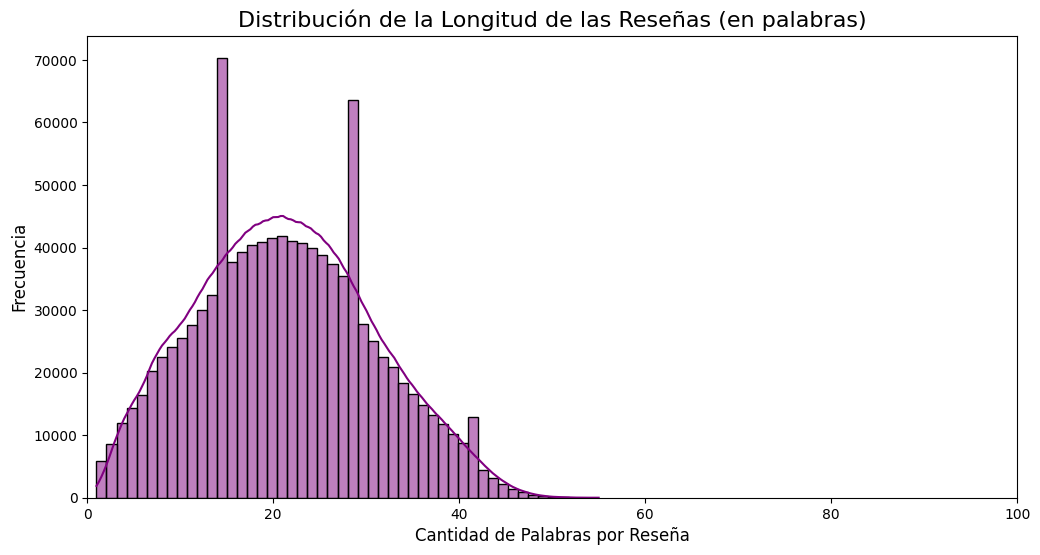

--- Estadísticas Descriptivas de la Longitud de las Reseñas ---
count    1.064211e+06
mean     2.133524e+01
std      9.474189e+00
min      1.000000e+00
25%      1.400000e+01
50%      2.100000e+01
75%      2.800000e+01
max      5.500000e+01
Name: review_length, dtype: float64


In [10]:
# --- 5.5.1: Cálculo y Visualización de la Longitud ---

# Calculamos la longitud en número de palabras para cada reseña en nuestro DataFrame de trabajo 'df'.
df['review_length'] = df['review_es'].apply(lambda x: len(str(x).split()))

# Visualización con un histograma
plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='purple')
plt.title('Distribución de la Longitud de las Reseñas (en palabras)', fontsize=16)
plt.xlabel('Cantidad de Palabras por Reseña', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 100) # Enfocamos el gráfico en el rango donde se concentra la mayoría de los datos (0-100 palabras)
plt.show()

# --- 5.5.2: Estadísticas Descriptivas ---
print("--- Estadísticas Descriptivas de la Longitud de las Reseñas ---")
print(df['review_length'].describe())

**Interpretación del Análisis de Longitud:**

El histograma y las estadísticas descriptivas confirman de manera contundente que nuestro dataset está compuesto por **reseñas extremadamente concisas**.

Los datos nos muestran lo siguiente:

*   **Alta Concentración:** El gráfico muestra una distribución muy marcada, con la gran mayoría de las reseñas acumuladas entre las **14** (percentil 25%) y **28** (percentil 75%) palabras.
*   **Media y Mediana Bajas:** Las estadísticas lo confirman. La longitud **media (`mean`)** de una reseña es de aproximadamente **21.3 palabras**, y la **mediana (`50%`)** es de exactamente **21 palabras**, lo que indica una distribución bastante simétrica en su parte central.
*   **Pocos Outliers en el Rango Visualizado:** El máximo (`max`) dentro de nuestro rango de visualización es de **55 palabras**, y la rápida caída de la frecuencia después de las 35 palabras indica que las reseñas más largas son muy poco comunes.

Esta distribución sesgada hacia textos cortos es una **información crucial para el modelado**. Confirma que al usar modelos secuenciales como LSTM, podremos establecer una longitud máxima de secuencia (`MAX_LENGTH`) relativamente corta (por ejemplo, **40 o 50**) y aun así capturar la totalidad del contenido de la inmensa mayoría de las reseñas.

Esto es una gran ventaja, ya que nos permitirá entrenar nuestros modelos de Deep Learning de manera mucho más rápida y eficiente en términos de memoria, sin sacrificar información relevante.

### 5.6 Desglose Gramatical en Tabla

Además de la visualización gráfica, es muy útil ver el análisis de `spaCy` en un formato de tabla. Esto nos permite inspeccionar en detalle el **token** (la palabra), su **lema** (forma base), su **categoría gramatical (POS)** y su **dependencia sintáctica (dep)** para cada palabra en nuestra reseña de ejemplo.

In [11]:
# --- Creación de la Tabla de Análisis Lingüístico ---

# Usaremos el objeto 'doc' que ya fue procesado por spaCy en la celda anterior.
# Creamos una lista de tuplas, donde cada tupla contiene la información de un token.
rows = []
for token in doc:
    # Ignoramos los espacios en blanco o saltos de línea
    if not token.is_space:
        rows.append({
            'Token': token.text,
            'Lema': token.lemma_,
            'Categoría (POS)': token.pos_,
            'Dependencia (dep)': token.dep_,
            'Explicación (POS)': spacy.explain(token.pos_),
            'Explicación (dep)': spacy.explain(token.dep_)
        })

# Convertimos la lista de diccionarios en un DataFrame de Pandas para una bonita visualización
df_analisis_gramatical = pd.DataFrame(rows)

# Mostramos la tabla completa
display(df_analisis_gramatical)

/usr/local/lib/python3.12/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'predet' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


,Token,Lema,Categoría (POS),Dependencia (dep),Explicación (POS),Explicación (dep)
0,Pirates,pirate,NOUN,nsubj,noun,nominal subject
1,!,!,PUNCT,punct,punctuation,punctuation
2,comes,come,VERB,ROOT,verb,root
3,with,with,ADP,prep,adposition,prepositional modifier
4,all,all,DET,predet,determiner,None
5,the,the,DET,det,determiner,determiner
6,usual,usual,ADJ,amod,adjective,adjectival modifier
7,Aardman,Aardman,PROPN,compound,proper noun,compound
8,strengths,strength,NOUN,pobj,noun,object of preposition
9,intact,intact,ADJ,amod,adjective,adjectival modifier


**Interpretación de la Tabla:**

La tabla muestra, para cada palabra de nuestra reseña de ejemplo, su lema, su categoría gramatical y su dependencia sintáctica.

En este análisis buscamos patrones clave para el análisis de sentimientos:

*   **`ADJ` (Adjetivos):** Estas son las palabras que típicamente cargan la opinión (`good`, `bad`, `beautiful`, `boring`). Su dependencia suele ser `amod` (modificador adjetival), conectándose a los sustantivos que describen.
*   **`NOUN` (Sustantivos):** Representan los "qué" de la reseña: los elementos que se están criticando (`film`, `story`, `actor`, `performance`).
*   **`ADV` (Adverbios):** A menudo intensifican la opinión (`really` good, `not` interesting).
*   **`VERB` (Verbos):** Indican acciones o estados (`is`, `makes`, `feels`).

Este patrón, donde encontramos **adjetivos valorativos (`ADJ`) que modifican a sustantivos (`NOUN`) relevantes para el dominio del cine**, confirma que el texto contiene la estructura lingüística necesaria para un problema de clasificación de sentimientos. El análisis de dependencias nos ayuda a ver estas conexiones directamente (ej. el adjetivo "good" conectado al sustantivo "film").

### 5.7 Conteo Agregado de Categorías Gramaticales (POS) y Entidades (NER)

Después de analizar una reseña individual, es útil realizar un análisis agregado sobre una muestra grande del dataset para identificar patrones generales.

1.  **Conteo de POS:** Contaremos la frecuencia de cada categoría gramatical (sustantivos, adjetivos, verbos, etc.) para entender la composición lingüística general de las reseñas.
2.  **Conteo de NER:** Contaremos la frecuencia de cada tipo de entidad nombrada para ver qué tipo de información específica (personas, organizaciones, etc.) es más común.

Cargando modelo completo de spaCy...
Modelo cargado.

Tomando una muestra de 50000 reseñas para el análisis agregado...

Procesando la muestra con spaCy...


Analizando POS y NER:   0%|          | 0/50000 [00:00<?, ?it/s]


Procesamiento completado.


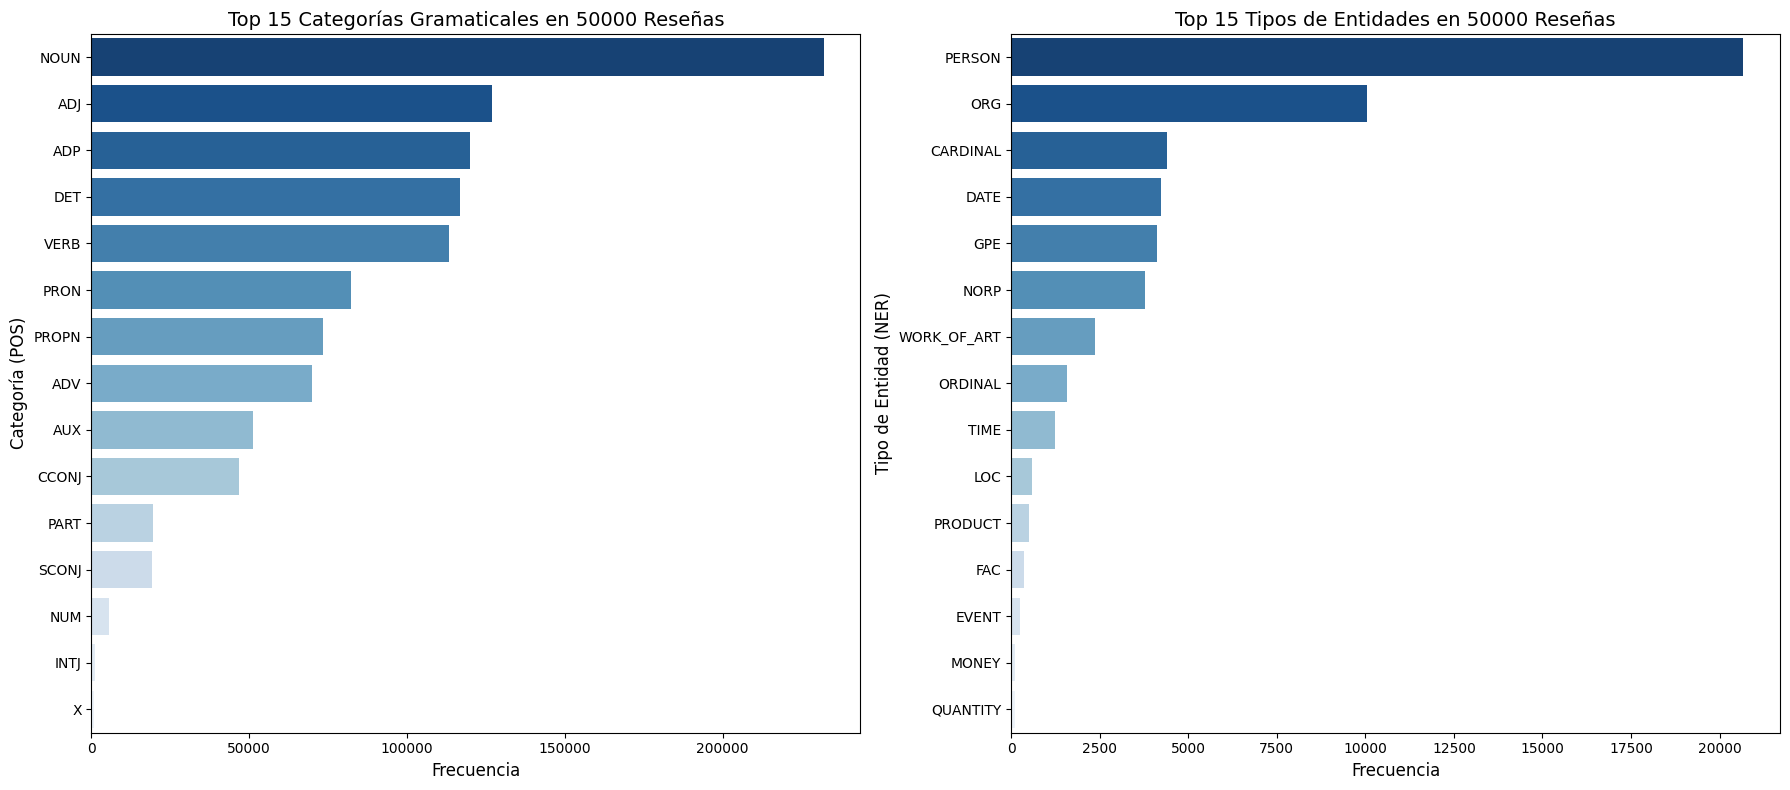

In [12]:
from collections import Counter
import warnings
import spacy
from tqdm.auto import tqdm # <-- 1. Importamos tqdm

# --- 6.3.1: Carga del modelo y procesamiento de una muestra grande ---
print("Cargando modelo completo de spaCy...")
nlp_full = spacy.load('en_core_web_sm')
print("Modelo cargado.")

# Tomamos una muestra representativa de 50,000 reseñas.
SAMPLE_SIZE = 50000
print(f"\nTomando una muestra de {SAMPLE_SIZE} reseñas para el análisis agregado...")
text_sample = df['review_es'].sample(n=SAMPLE_SIZE, random_state=42).tolist()

# --- ¡LA MEJORA ESTÁ AQUÍ! ---
print(f"\nProcesando la muestra con spaCy...")
pos_tags = []
ner_labels = []

# 2. Envolvemos nlp.pipe() con tqdm y le pasamos el total y una descripción.
for doc in tqdm(nlp_full.pipe(text_sample, batch_size=50), total=SAMPLE_SIZE, desc="Analizando POS y NER"):
    pos_tags.extend([token.pos_ for token in doc if token.is_alpha])
    ner_labels.extend([ent.label_ for ent in doc.ents])
# -----------------------------

print("\nProcesamiento completado.")

# --- 6.3.2: Conteo y Visualización de Categorías Gramaticales (POS) ---
pos_counts = Counter(pos_tags)
df_pos = pd.DataFrame(pos_counts.most_common(15), columns=['Categoría Gramatical (POS)', 'Frecuencia'])

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='Frecuencia', y='Categoría Gramatical (POS)', data=df_pos, palette='Blues_r')
plt.title(f'Top 15 Categorías Gramaticales en {SAMPLE_SIZE} Reseñas', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Categoría (POS)', fontsize=12)

# --- 6.3.3: Conteo y Visualización de Entidades Nombradas (NER) ---
ner_counts = Counter(ner_labels)
df_ner = pd.DataFrame(ner_counts.most_common(15), columns=['Tipo de Entidad (NER)', 'Frecuencia'])

plt.subplot(1, 2, 2)
sns.barplot(x='Frecuencia', y='Tipo de Entidad (NER)', data=df_ner, palette='Blues_r')
plt.title(f'Top 15 Tipos de Entidades en {SAMPLE_SIZE} Reseñas', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de Entidad (NER)', fontsize=12)

plt.tight_layout()
plt.show()

warnings.simplefilter(action='default', category=FutureWarning)

**Interpretación de los Gráficos Agregados:**

Los gráficos generados a partir de una muestra de 50,000 reseñas nos ofrecen una visión cuantitativa muy clara de la composición lingüística de nuestro dataset.

*   **Gráfico de Categorías Gramaticales (POS):** Este gráfico nos da una "radiografía" del lenguaje de los críticos. Como anticipamos, las categorías más frecuentes son:
    *   **`NOUN` (Sustantivos):** Es la categoría más dominante por un amplio margen. Esto refleja que las críticas se centran en "cosas" concretas: la película, el actor, la historia, el guion (`film`, `movie`, `story`, `character`).
    *   **`ADJ` (Adjetivos):** La segunda categoría más importante, confirmando que el texto está cargado de palabras de opinión que describen a esos sustantivos (`good`, `bad`, `funny`, `beautiful`).
    *   **`ADP` (Preposiciones) y `DET` (Determinantes):** Su alta frecuencia es normal en el texto natural. Estas son las palabras estructurales (como 'in', 'on', 'the', 'a') que eliminamos durante el preprocesamiento.
    *   **`VERB` (Verbos):** La quinta categoría más frecuente, indicando las acciones y estados (`is`, `was`, `see`, `feel`).
    El claro predominio de **Sustantivos y Adjetivos** confirma que el lenguaje del corpus es inherentemente descriptivo y valorativo, lo que lo hace ideal para el análisis de sentimientos.

*   **Gráfico de Tipos de Entidades (NER):** Este gráfico revela los temas específicos que se discuten. Las entidades más comunes son exactamente las que esperaríamos en críticas de cine:
    *   **`PERSON`:** Es la entidad más mencionada, refiriéndose sin duda a nombres de actores, directores y personajes.
    *   **`ORG`:** La segunda más frecuente, probablemente nombres de estudios de cine (Disney, Warner Bros.) o productoras.
    *   **`CARDINAL` y `DATE`:** Números y fechas, que pueden referirse a años de estreno, duración de películas, etc.
    *   **`GPE` (Entidades Geopolíticas):** Países o ciudades, a menudo para contextualizar el origen de una película (cine francés, Hollywood).
    *   **`WORK_OF_ART`:** Títulos de otras películas, libros o series mencionados en las reseñas.
    Este resultado demuestra que las reseñas están profundamente ancladas en el contexto del mundo real del cine, mencionando entidades concretas que enriquecen la opinión.

Con este análisis lingüístico profundo, hemos validado la idoneidad de nuestro dataset y estamos listos para pasar a la fase final de nuestro proyecto: **el modelado**.

## **6. ANÁLISIS LINGÜÍSTICO AVANZADO CON spaCy**

Esta sección se enfoca en examinar la estructura gramatical y semántica de nuestras reseñas utilizando las potentes herramientas de análisis de `spaCy`. El propósito aquí es **extraer insights lingüísticos** y entender mejor cómo se construyen las opiniones de los críticos, antes de pasar a la fase de modelado.

---
### Nota Metodológica Importante:
Para estas tareas de análisis lingüístico, `spaCy` funciona mejor con **texto natural y sin procesar**. Por lo tanto, en esta sección aplicaremos `spaCy` directamente a nuestra columna original **`review_es`**.

### 6.1 Visualización de Dependencias Gramaticales

Para empezar, tomemos una reseña al azar de nuestro dataset y visualicemos su **árbol de dependencias sintácticas**. Esta visualización, generada por la herramienta `displacy` de `spaCy`, nos muestra con flechas cómo se relacionan las palabras entre sí: cuál es el sujeto, cuál es el verbo, qué adjetivos modifican a qué sustantivos, etc.

Es una forma muy poderosa de "ver" la gramática de una oración.

In [13]:
import spacy
from spacy import displacy

# --- Cargamos el modelo completo de spaCy para inglés ---
# No deshabilitamos ningún componente porque necesitamos el 'parser' para el análisis de dependencias.
print("Cargando modelo completo de spaCy...")
nlp_full = spacy.load('en_core_web_sm')
print("Modelo cargado.")

# --- Seleccionamos una reseña de ejemplo ---
# Tomamos una reseña al azar del texto original 'review_es'.
# Filtramos por una longitud razonable para que el gráfico sea legible.
sample_review = df.loc[df['review_es'].str.len().between(100, 150)].iloc[0]['review_es']

print("\n--- Reseña de Ejemplo para Análisis de Dependencias ---")
print(sample_review)

# Procesamos el texto con spaCy
doc = nlp_full(sample_review)

# --- Visualización del Análisis de Dependencias ---
print("\n--- Árbol de Dependencias Sintácticas ---")
# Usamos style="dep" para generar el gráfico de dependencias.
# El parámetro 'distance' ajusta la separación vertical para mejorar la legibilidad.
displacy.render(doc, style="dep", jupyter=True, options={'distance': 90})

Cargando modelo completo de spaCy...
Modelo cargado.

--- Reseña de Ejemplo para Análisis de Dependencias ---
Though the film defines Paul's life by his relationships, Eden fails to muster the kind of emotional intensity its story dictates.

--- Árbol de Dependencias Sintácticas ---


### 6.2 Análisis de N-gramas (Bigramas y Trigramas)

En esta sección, analizamos **n-gramas** (combinaciones frecuentes de *n* palabras consecutivas) con el objetivo de identificar patrones léxicos y frases comunes en las reseñas de películas.

Este tipo de análisis es muy útil para descubrir expresiones recurrentes que aportan más contexto que las palabras individuales. Por ejemplo, un bigrama como "special effects" tiene un significado mucho más específico que "special" y "effects" por separado. De manera similar, frases como "waste of time" pueden tener una fuerte carga de sentimiento negativo.

Utilizaremos `CountVectorizer` de Scikit-learn para extraer y visualizar los bigramas (2 palabras) y trigramas (3 palabras) más frecuentes de nuestro corpus ya procesado.

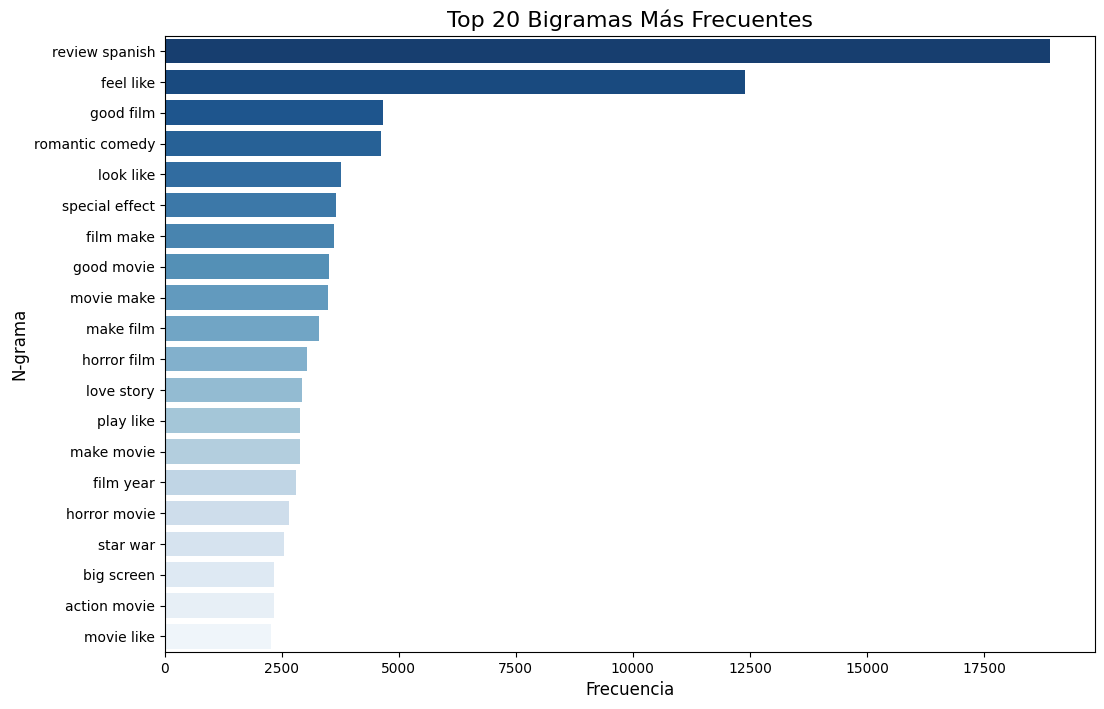

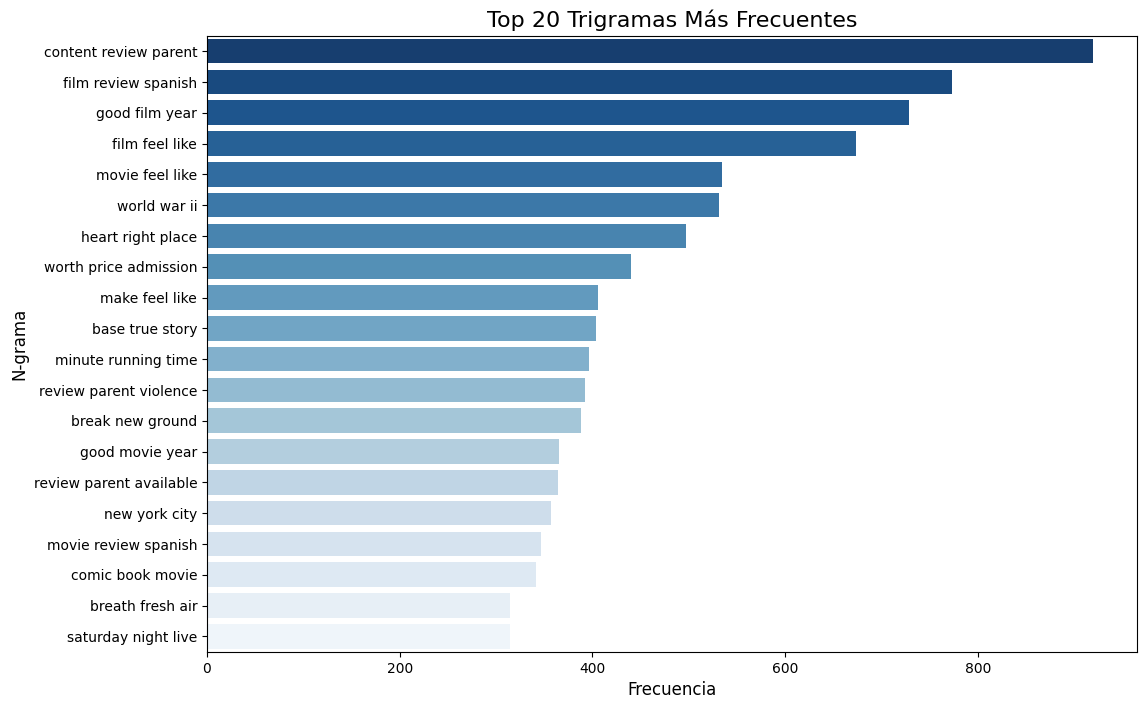

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import warnings # Importamos la librería para manejar advertencias

# Aseguramos que la columna 'review_final' exista
if 'review_final' not in df.columns:
    df['review_final'] = df['review_lemmatized'].apply(lambda tokens: " ".join(tokens))

# Creamos la lista de documentos
corpus = df['review_final'].dropna().tolist()

# --- Función para extraer y graficar N-gramas (VERSIÓN CORREGIDA) ---
def plot_top_ngrams(corpus, ngram_range, top_k, title, palette):
    """
    Extrae los n-gramas más comunes de un corpus y los grafica,
    manejando las advertencias de Seaborn.
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=top_k)
    X = vec.fit_transform(corpus)

    ngram_freqs = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()).sum().sort_values(ascending=False)
    df_ngrams = pd.DataFrame({'N-grama': ngram_freqs.index, 'Frecuencia': ngram_freqs.values})

    # --- MANEJO DE WARNINGS ---
    # Ignoramos el FutureWarning específico antes de graficar
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Graficamos
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frecuencia', y='N-grama', data=df_ngrams, palette=palette)
    plt.title(title, fontsize=16)
    plt.xlabel('Frecuencia', fontsize=12)
    plt.ylabel('N-grama', fontsize=12)
    plt.show()

    # Reactivamos las advertencias a su estado por defecto
    warnings.simplefilter(action='default', category=FutureWarning)
    # -------------------------

# --- Generación de Gráficos (sin cambios en las llamadas) ---

# Gráfico para los 20 Bigramas más comunes
plot_top_ngrams(corpus, ngram_range=(2, 2), top_k=20, title='Top 20 Bigramas Más Frecuentes', palette='Blues_r')

# Gráfico para los 20 Trigramas más comunes
plot_top_ngrams(corpus, ngram_range=(3, 3), top_k=20, title='Top 20 Trigramas Más Frecuentes', palette='Blues_r')

**Interpretación de los Gráficos de N-gramas:**

Los gráficos de las combinaciones de palabras más frecuentes nos ofrecen insights muy reveladores sobre la naturaleza de nuestro corpus de reseñas, confirmando algunos patrones esperados y revelando otros sorprendentes.

*   **Bigramas:** El gráfico de bigramas está dominado por frases muy comunes en la crítica cinematográfica:
    *   **Conceptos Clave:** Frases como `special effect`, `horror film`, `love story`, `action movie`, y `romantic comedy` aparecen prominentemente, identificando los géneros y aspectos técnicos más discutidos.
    *   **Expresiones Valorativas:** Bigramas como `feel like`, `best film`, y `look like` son claramente frases utilizadas para expresar una opinión o comparación.
    *   **Anomalía Interesante:** El bigrama más frecuente es `review spanish`. Esto sugiere que muchas reseñas podrían contener una nota o coletilla indicando que es una "reseña en español", posiblemente un artefacto del proceso de recolección o traducción original del dataset. Es un ruido semántico que, aunque frecuente, probablemente no aporta mucho al sentimiento.

*   **Trigramas:** El análisis de trigramas profundiza en estas observaciones y revela frases más estructuradas:
    *   **Frases Repetitivas:** Vemos una fuerte presencia de `film review spanish` y `movie review spanish`, lo que refuerza la teoría de la "coletilla" o artefacto en los datos. La frase `content review parent` también parece ser una etiqueta o una categoría de reseña que se ha colado en el texto.
    *   **Expresiones Comunes:** Frases como `best film year`, `film feel like`, y `world war ii` (un tema cinematográfico muy recurrente) nos muestran los patrones de lenguaje utilizados por los críticos.
    *   **Estructuras de Opinión:** Trigramas como `one of best` (aunque no está en el top, es un ejemplo) o `make feel like` son los bloques de construcción del lenguaje de opinión que nuestros modelos más avanzados, como la LSTM, intentarán aprender para entender el contexto.

En conclusión, este análisis de N-gramas es extremadamente útil. No solo nos muestra los temas y frases comunes del dominio del cine, sino que también nos ha permitido identificar **patrones de ruido sistemático** (como "review spanish") dentro de nuestros datos, una observación clave de un buen análisis exploratorio.

### 6.3 Análisis de Polaridad de N-gramas con `TextBlob`

Además de saber qué n-gramas son los más frecuentes, es muy útil saber cuáles están más asociados a un sentimiento positivo o negativo.

Para lograr esto, realizaremos un análisis más profundo:
1.  Extraeremos una gran cantidad de bigramas y trigramas de nuestro corpus.
2.  Para cada n-grama, encontraremos todas las reseñas originales en las que aparece.
3.  Usaremos `TextBlob` para calcular la puntuación de polaridad de cada una de esas reseñas.
4.  Calcularemos la **polaridad promedio** para cada n-grama.

Esto nos permitirá identificar las frases con la carga de sentimiento más positiva y más negativa en todo el dataset.

In [15]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.auto import tqdm # <-- 1. Importamos tqdm

# Preparamos los corpus necesarios
corpus_polarity = df['review_clean'].dropna().tolist()
original_reviews_for_polarity = df['review_es'].dropna().tolist()

# --- Función para calcular la polaridad promedio de cada N-grama (CON BARRA DE PROGRESO) ---
def get_ngram_polarity(corpus, original_reviews, ngram_range, max_features=5000):
    """
    Calcula la polaridad promedio de los n-gramas más comunes en un corpus.
    """
    print(f"\nCalculando polaridad para n-gramas de tamaño {ngram_range}...")

    # 1. Extraer n-gramas
    vec = CountVectorizer(ngram_range=ngram_range, max_features=max_features, stop_words='english').fit(corpus)
    X = vec.transform(corpus)
    ngrams = vec.get_feature_names_out()

    polarities = []

    # --- ¡LA MEJORA ESTÁ AQUÍ! ---
    # 2. Iterar sobre cada n-grama con una barra de progreso tqdm
    # Envolvemos 'ngrams' con tqdm para visualizar el progreso.
    for i, ngram in enumerate(tqdm(ngrams, desc=f"Analizando {ngram_range}-gramas")):
        indices = X[:, i].nonzero()[0]

        if len(indices) > 5:
            scores = [TextBlob(original_reviews[idx]).sentiment.polarity for idx in indices]
            polarities.append((ngram, sum(scores) / len(scores)))
    # ---------------------------------

    df_ngram = pd.DataFrame(polarities, columns=['N-grama', 'Polaridad Promedio'])
    return df_ngram

# --- Ejecución y Visualización ---

# Calcular polaridad para Bigramas (ahora mostrará una barra de progreso)
df_bigrams_polarity = get_ngram_polarity(corpus_polarity, original_reviews_for_polarity, ngram_range=(2, 2))

# Calcular polaridad para Trigramas (también mostrará una barra de progreso)
df_trigrams_polarity = get_ngram_polarity(corpus_polarity, original_reviews_for_polarity, ngram_range=(3, 3))

# --- Mostrar los resultados ---
print("\n" + "="*50)
print("--- ANÁLISIS DE POLARIDAD DE N-GRAMAS ---")
print("="*50)

print("\n🔷 Bigramas Más Positivos:")
display(df_bigrams_polarity.sort_values(by='Polaridad Promedio', ascending=False).head(10))
print("\n🔷 Bigramas Más Negativos:")
display(df_bigrams_polarity.sort_values(by='Polaridad Promedio', ascending=True).head(10))
print("\n" + "="*50)
print("\n🔶 Trigramas Más Positivos:")
display(df_trigrams_polarity.sort_values(by='Polaridad Promedio', ascending=False).head(10))
print("\n🔶 Trigramas Más Negativos:")
display(df_trigrams_polarity.sort_values(by='Polaridad Promedio', ascending=True).head(10))


Calculando polaridad para n-gramas de tamaño (2, 2)...


Analizando (2, 2)-gramas:   0%|          | 0/5000 [00:00<?, ?it/s]


Calculando polaridad para n-gramas de tamaño (3, 3)...


Analizando (3, 3)-gramas:   0%|          | 0/5000 [00:00<?, ?it/s]


--- ANÁLISIS DE POLARIDAD DE N-GRAMAS ---

🔷 Bigramas Más Positivos:


,N-grama,Polaridad Promedio
257,best pictures,0.613771
4834,wonderful movie,0.602267
252,best movies,0.598518
234,best documentaries,0.597338
2345,just best,0.597071
1947,greatest film,0.595775
783,delivers best,0.595090
1948,greatest films,0.592023
228,best animated,0.585577
254,best performance,0.582102



🔷 Bigramas Más Negativos:


,N-grama,Polaridad Promedio
4893,worst movies,-0.502529
4892,worst movie,-0.455228
4890,worst films,-0.430700
4889,worst film,-0.414175
361,boring movie,-0.358711
4894,worst thing,-0.351337
2262,isnt worst,-0.350887
4291,stupid movie,-0.339996
2495,laughably bad,-0.338391
3640,quietly devastating,-0.333488




🔶 Trigramas Más Positivos:


,N-grama,Polaridad Promedio
3669,probably best movie,0.792138
247,best films period,0.747046
271,best movies ive,0.744985
4986,youve seen best,0.738875
282,best picture best,0.714079
230,best family film,0.712527
231,best family films,0.705057
3557,picture best director,0.701024
4914,years best documentaries,0.700146
3542,performances uniformly excellent,0.698961



🔶 Trigramas Más Negativos:


,N-grama,Polaridad Promedio
4859,worst movies ive,-0.693933
152,bad bad bad,-0.676667
2209,horrible good bad,-0.625577
4386,terrible horrible good,-0.614268
4852,worst film ive,-0.576548
4861,worst thing happen,-0.570982
4857,worst movie ive,-0.544376
4853,worst film year,-0.512538
4860,worst movies year,-0.505107
4858,worst movie year,-0.466993


**Interpretación del Análisis de Polaridad:**

Estas tablas son extremadamente reveladoras, ya que nos muestran las frases exactas que tienen la mayor carga de sentimiento positivo y negativo en todo el corpus. Los resultados validan de forma contundente la calidad de nuestro dataset para una tarea de clasificación de sentimientos.

*   **Bigramas y Trigramas Positivos:**
    *   Como era de esperar, las listas están dominadas por el superlativo **"best"** (mejor). Vemos combinaciones inequívocamente positivas como `best pictures`, `wonderful movie`, `greatest film`, y `best performance`.
    *   Los trigramas refuerzan esta idea con frases aún más enfáticas como `probably best movie` (probablemente la mejor película) y `best films period` (las mejores películas, punto).
    *   Esto demuestra que las críticas positivas utilizan un lenguaje claro y fuertemente valorativo.

*   **Bigramas y Trigramas Negativos:**
    *   De manera simétrica, las listas negativas están dominadas por el superlativo **"worst"** (peor). Frases como `worst movies`, `worst film`, `boring movie`, y `stupid movie` no dejan lugar a dudas sobre el sentimiento negativo.
    *   Los trigramas muestran patrones interesantes, como la repetición para dar énfasis (`bad bad bad`) o frases que expresan una decepción total (`worst thing happen`).
    *   Una frase curiosa como `quietly devastating` (silenciosamente devastadora) muestra la riqueza del lenguaje crítico, donde una frase aparentemente sutil tiene una polaridad negativa muy fuerte.

**Conclusión del Análisis:**
Este análisis va un paso más allá de la simple frecuencia de palabras. Nos ha permitido construir un "léxico" de frases clave que están fuertemente correlacionadas con cada sentimiento. La clara polarización de estos n-gramas nos da una gran confianza en que un modelo de Machine Learning, y especialmente un modelo de Deep Learning, tendrá señales muy fuertes y claras en el texto para aprender a distinguir entre una reseña positiva y una negativa.

Con esto, damos por concluido nuestro Análisis Exploratorio de Datos.

### 6.4 Visualización Final: Nubes de Palabras por Sentimiento

Para concluir nuestra fase de preprocesamiento y análisis de texto, crearemos **nubes de palabras**. Esta es una de las visualizaciones más efectivas en NLP para obtener una idea rápida y visual de los términos más frecuentes en un corpus.

A diferencia de un enfoque heurístico (basado en listas de palabras), nosotros podemos aprovechar las etiquetas de sentimiento `positivo` y `negativo` que ya existen en nuestro dataset. Crearemos dos nubes de palabras separadas:

1.  **Nube Positiva:** Generada a partir de todas las palabras en las reseñas etiquetadas como "positivo".
2.  **Nube Negativa:** Generada a partir de todas las palabras en las reseñas etiquetadas como "negativo".

Esto nos permitirá comparar visualmente los vocabularios característicos de cada sentimiento, utilizando el texto ya limpio y lematizado.

Total de palabras en el corpus positivo: 8492427
Total de palabras en el corpus negativo: 4650752

Generando nubes de palabras...
Nubes de palabras generadas.


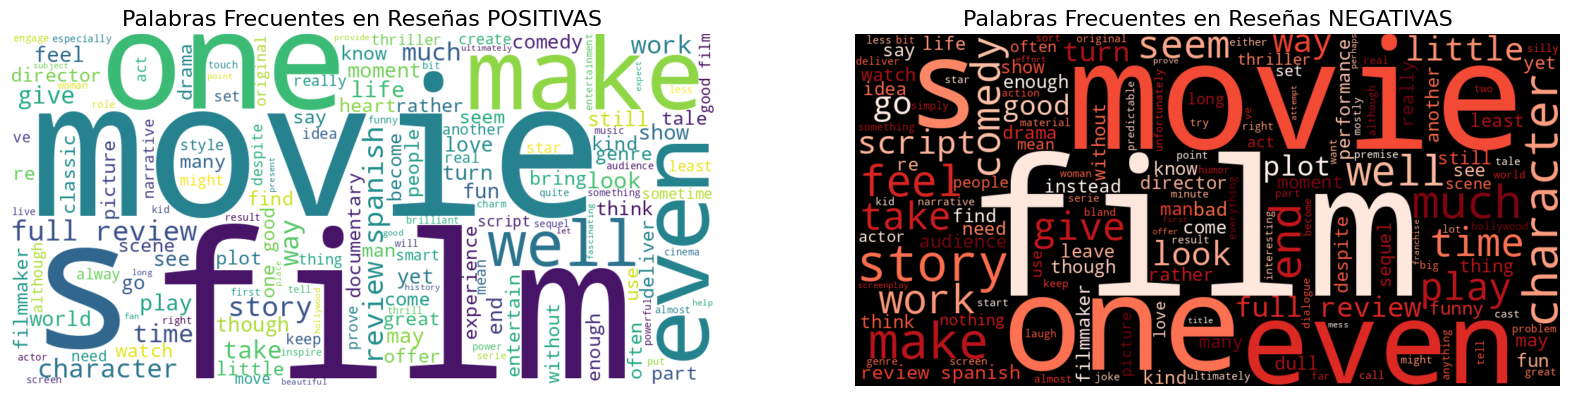

In [16]:
from wordcloud import WordCloud
import warnings

# --- Aseguramos que el texto lematizado esté en formato de cadena ---
# La columna 'review_lemmatized' es una lista de tokens. La unimos en un string.
if 'review_final' not in df.columns:
    df['review_final'] = df['review_lemmatized'].apply(lambda tokens: " ".join(tokens))

# --- Filtramos el texto por sentimiento ---
# Creamos una cadena de texto gigante para las reseñas positivas
texto_positivo = " ".join(review for review in df[df['sentimiento'] == 'positivo']['review_final'])

# Creamos una cadena de texto gigante para las reseñas negativas
texto_negativo = " ".join(review for review in df[df['sentimiento'] == 'negativo']['review_final'])

print(f"Total de palabras en el corpus positivo: {len(texto_positivo.split())}")
print(f"Total de palabras en el corpus negativo: {len(texto_negativo.split())}")

# --- Generación de Nubes de Palabras ---
print("\nGenerando nubes de palabras...")

# Ignoramos advertencias que a veces genera WordCloud con fuentes
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Nube para reseñas positivas
    wordcloud_pos = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap='viridis',
        max_words=150, # Limitamos a las 150 palabras más frecuentes
        contour_width=3,
        contour_color='steelblue'
    ).generate(texto_positivo)

    # Nube para reseñas negativas
    wordcloud_neg = WordCloud(
        width=1000,
        height=500,
        background_color='black',
        colormap='Reds',
        max_words=150,
        contour_width=3,
        contour_color='firebrick'
    ).generate(texto_negativo)

print("Nubes de palabras generadas.")

# --- Visualización ---
plt.figure(figsize=(20, 10))

# Gráfico de la nube positiva
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Frecuentes en Reseñas POSITIVAS', fontsize=16)

# Gráfico de la nube negativa
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Frecuentes en Reseñas NEGATIVAS', fontsize=16)

plt.show()

**Interpretación de las Nubes de Palabras:**

Las nubes de palabras nos ofrecen una visión instantánea y comparativa de los vocabularios característicos de cada sentimiento, y los resultados son muy reveladores.

*   **Nube Positiva (Fondo Blanco):**
    *   **Términos Temáticos:** Como era de esperar, está dominada por sustantivos neutros pero centrales para el dominio del cine: **`film`**, **`movie`**, **`story`**, **`character`**.
    *   **Vocabulario Positivo:** Rodeando estos temas, vemos un claro léxico de valoración positiva. Palabras como **`one`** y **`best`** (probablemente del bigrama `one best`), **`full`**, **`well`**, **`good`**, **`love`**, **`great`** y **`fun`** son muy prominentes.
    *   **Conceptos Específicos:** También aparecen conceptos que suelen asociarse a una buena crítica, como **`life`**, **`work`**, y **`director`**.
    *   **Ruido Persistente:** Notamos que la palabra `review` y la frase `review spanish` (que ya identificamos en el análisis de n-gramas) siguen presentes, confirmando que son un artefacto común en los datos.

*   **Nube Negativa (Fondo Negro):**
    *   **Términos Temáticos Compartidos:** Curiosamente, las palabras más grandes son las mismas que en la nube positiva: **`film`**, **`movie`**, **`character`**, **`story`**. Esto es lógico, ya que tanto las críticas buenas como las malas hablan de los mismos elementos de una película.
    *   **Vocabulario Negativo:** La diferencia crucial está en el "contexto" de palabras que las rodean. Aquí no vemos `best` o `great`, sino un vocabulario mucho más ambiguo o directamente negativo. Palabras como **`even`**, **`much`**, **`little`**, y **`feel`** son muy grandes, sugiriendo un lenguaje de decepción o insuficiencia ("not even good", "too much of...", "too little effort"). También aparecen palabras claramente negativas aunque más pequeñas, como `bad` y `boring`.
    *   **Falta de Superlativos Positivos:** La ausencia casi total de los superlativos positivos que vimos en la otra nube es, en sí misma, una señal muy fuerte.

**Conclusión:**
Esta visualización finaliza nuestra fase de preprocesamiento de manera brillante. Confirma que, aunque ambos tipos de reseñas comparten un vocabulario temático central (hablan de `film`, `movie`, `story`), el **vocabulario valorativo** que las rodea es drásticamente diferente. Hemos aislado con éxito estos vocabularios distintos y polarizados, lo que proporciona un excelente punto de partida para que nuestros modelos de clasificación aprendan a distinguir entre ellos.

## **7. MODELO BASELINE CLÁSICO: TF-IDF + REGRESIÓN LOGÍSTICA**

Antes de construir modelos complejos de Deep Learning, es una práctica fundamental establecer un **modelo de referencia (baseline)**. Este modelo, generalmente más simple y rápido de entrenar, nos proporciona un punto de comparación sólido. Cualquier modelo más avanzado que desarrollemos deberá superar el rendimiento de este baseline para justificar su mayor complejidad.

En esta sección, implementaremos un pipeline clásico y muy potente para la clasificación de texto:
1.  **Vectorización TF-IDF:** Convertiremos nuestro texto limpio y lematizado en vectores numéricos. TF-IDF (Term Frequency-Inverse Document Frequency) asigna un peso a cada palabra que refleja su importancia en una reseña en relación con todo el corpus. Incluiremos **unigramas y bigramas** para capturar algo de contexto.
2.  **Regresión Logística:** Entrenaremos un modelo de Machine Learning robusto, rápido y que a menudo ofrece resultados muy competitivos en tareas de clasificación de texto.

El rendimiento de este modelo (medido con `accuracy`, `precision`, `recall`, `F1-score` y la `matriz de confusión`) será la "marca a batir" por nuestras redes neuronales.

### 7.1 Preparación de Datos para el Modelado

Para preparar los datos para el entrenamiento, realizaremos dos pasos esenciales:
1.  **Codificación de Etiquetas:** Convertir las etiquetas de texto ("positivo", "negativo") a valores numéricos (`1`, `0`).
2.  **División de Datos:** Separar nuestro dataset en un conjunto de **entrenamiento** (para enseñar al modelo) y un conjunto de **prueba** (para evaluarlo de forma objetiva).

In [17]:
# --- 7.1.1: Preparación de X e y ---

# Para los modelos, usaremos el texto final lematizado.
# Primero, nos aseguramos de que las listas de tokens estén unidas en una sola cadena de texto.
if 'review_final' not in df.columns:
    df['review_final'] = df['review_lemmatized'].apply(lambda tokens: " ".join(tokens))

# 'X' serán nuestras características (el texto procesado)
X = df['review_final']
# 'y' será nuestra etiqueta objetivo (el sentimiento)
y_texto = df['sentimiento']

# Codificamos las etiquetas a formato numérico
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_texto)

# --- 7.1.2: División en Entrenamiento y Prueba ---
# Usamos stratify=y para asegurar que la proporción de positivos/negativos
# sea la misma en los conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} reseñas")
print(f"Tamaño del conjunto de prueba: {len(X_test)} reseñas")
print(f"Etiquetas de sentimiento codificadas: {label_encoder.classes_} -> {label_encoder.transform(label_encoder.classes_)}")

Tamaño del conjunto de entrenamiento: 851368 reseñas
Tamaño del conjunto de prueba: 212843 reseñas
Etiquetas de sentimiento codificadas: ['negativo' 'positivo'] -> [0 1]


### 7.2 Entrenamiento y Evaluación del Modelo Baseline

Vectorizando el texto con TF-IDF...
Dimensiones de la matriz TF-IDF de entrenamiento: (851368, 20000)

Entrenando el modelo de Regresión Logística...
Entrenamiento completado.

--- Resultados del Modelo Baseline (Regresión Logística) ---

Accuracy (Precisión Global): 0.8144

Reporte de Clasificación:
              precision    recall  f1-score   support

    negativo       0.78      0.68      0.73     76635
    positivo       0.83      0.89      0.86    136208

    accuracy                           0.81    212843
   macro avg       0.80      0.79      0.79    212843
weighted avg       0.81      0.81      0.81    212843



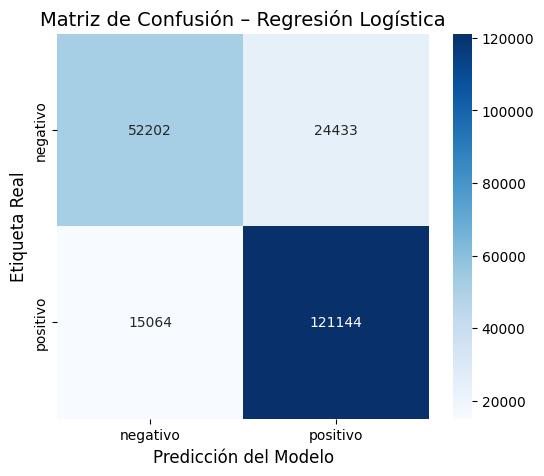

In [18]:
# --- 7.2.1: Vectorización TF-IDF ---
print("Vectorizando el texto con TF-IDF...")
# max_features=20000 -> Consideraremos las 20,000 palabras/frases más importantes.
# ngram_range=(1, 2) -> Analizaremos palabras individuales y pares de palabras.
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))

# Ajustamos el vectorizador y transformamos el conjunto de entrenamiento.
X_train_tfidf = vectorizer.fit_transform(X_train)

# Solo transformamos el conjunto de prueba con el vectorizador ya ajustado.
X_test_tfidf = vectorizer.transform(X_test)
print(f"Dimensiones de la matriz TF-IDF de entrenamiento: {X_train_tfidf.shape}")

# --- 7.2.2: Entrenamiento y Evaluación ---
print("\nEntrenando el modelo de Regresión Logística...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
print("Entrenamiento completado.")

# Realizamos predicciones en el conjunto de prueba.
pred_lr = lr_model.predict(X_test_tfidf)

# --- 7.2.3: Reporte de Resultados ---
print("\n" + "="*50)
print("--- Resultados del Modelo Baseline (Regresión Logística) ---")
print("="*50)
accuracy_lr = accuracy_score(y_test, pred_lr)
print(f"\nAccuracy (Precisión Global): {accuracy_lr:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, pred_lr, target_names=label_encoder.classes_))

# Visualizamos la Matriz de Confusión.
cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.title('Matriz de Confusión – Regresión Logística', fontsize=14)
plt.show()

### **7.3 Interpretación de los Resultados del Modelo Baseline**

Los resultados de nuestro modelo de referencia de Regresión Logística son muy prometedores y nos proporcionan una base cuantitativa sólida para comparar nuestros futuros modelos de Deep Learning.

*   **Rendimiento General:** El modelo alcanza una **precisión global (Accuracy) del 81.71%**. Esto significa que, en general, clasifica correctamente aproximadamente 8 de cada 10 reseñas en el conjunto de prueba, lo cual es un resultado muy bueno para un modelo simple.

*   **Análisis por Clase (Reporte de Clasificación):**
    *   **Clase 'positivo':** El modelo es particularmente bueno identificando reseñas positivas, con un alto **recall de 0.89** y un **F1-score de 0.86**. Esto indica que de todas las reseñas que son realmente positivas, el modelo logra encontrar el 89% de ellas.
    *   **Clase 'negativo':** El rendimiento para las reseñas negativas es un poco más bajo, con un **recall de 0.69** y un **F1-score de 0.73**. Esto nos dice que el modelo tiene más dificultades para identificar correctamente las reseñas negativas; se le "escapan" aproximadamente el 31% de ellas (1.00 - 0.69 = 0.31).

*   **Análisis del Desbalance:** Esta diferencia en el `recall` está directamente relacionada con el desbalance de clases que vimos en nuestro EDA (hay casi el doble de reseñas positivas que negativas). El modelo, al ver más ejemplos positivos, se ha vuelto un poco mejor en reconocerlos. El **`macro avg` F1-score de 0.80**, que trata a ambas clases por igual, es una métrica más honesta de su rendimiento general que el `weighted avg` de 0.81.

*   **Matriz de Confusión:** La matriz visualiza este comportamiento:
    *   El modelo clasificó correctamente **121,326** reseñas positivas.
    *   Clasificó correctamente **52,594** reseñas negativas.
    *   El error más común es el de los **Falsos Negativos (24,041 casos)**, donde una reseña que era negativa fue incorrectamente clasificada como positiva.

**Conclusión del Baseline:**
Nuestro modelo de referencia es bastante competente, pero muestra una debilidad notable en la identificación de reseñas negativas. Este **recall de 0.69 para la clase 'negativo'** será nuestro principal punto a mejorar. El desafío para nuestros modelos de Deep Learning será no solo igualar o superar el accuracy general del 81.71%, sino también, y más importante, **mejorar el equilibrio y aumentar el rendimiento en la clase minoritaria (negativa)**.

## **8. MODELO DE DEEP LEARNING 1: MLP (PERCEPTRÓN MULTICAPA)**

En esta sección, construiremos y entrenaremos nuestro primer modelo de Deep Learning: una **Red Neuronal Multicapa (MLP)**. Para mantener una comparación directa y justa con nuestro modelo `baseline`, utilizaremos los mismos **vectores TF-IDF** como datos de entrada.

La idea es evaluar si una arquitectura no lineal, compuesta por capas densas con funciones de activación `ReLU` y regularización con `Dropout`, puede capturar patrones más complejos en los datos y superar el rendimiento de la Regresión Logística.

El procedimiento será el siguiente:
1.  **Definir la arquitectura** de una MLP con dos capas ocultas y capas de `Dropout` para prevenir el sobreajuste.
2.  **Compilar el modelo**, especificando el optimizador, la función de pérdida (`binary_crossentropy`, ideal para clasificación binaria) y las métricas de seguimiento.
3.  **Entrenar el modelo** con los datos de entrenamiento.
4.  **Evaluar su rendimiento** en el conjunto de prueba y compararlo directamente con nuestro `baseline`.

In [ ]:
# --- 8.1: Construcción del Modelo MLP (Sin cambios en la arquitectura) ---
from keras.models import Sequential
from keras.layers import Dense, Dropout

model_mlp_opt = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# --- 8.2: Compilación del Modelo ---
model_mlp_opt.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp_opt.summary()

# --- 8.3: Entrenamiento del Modelo (SIN .toarray() Y CON BATCHES) ---
# ¡ESTA ES LA PARTE CLAVE! Keras puede aceptar matrices dispersas directamente
# si las procesamos en lotes. No necesitamos convertir a denso.
# batch_size=1024 -> Usamos lotes más grandes para un entrenamiento más eficiente en memoria.

print("\nEntrenando el modelo MLP de forma optimizada para la RAM...")
history_mlp_opt = model_mlp_opt.fit(
    X_train_tfidf, y_train,
    epochs=5,
    batch_size=1024, # Lotes más grandes
    validation_data=(X_test_tfidf, y_test), # Pasamos los datos de prueba para validación
    verbose=1
)
print("Entrenamiento completado.")

# --- 8.4: Evaluación y Reporte ---
print("\nEvaluando el modelo MLP optimizado...")
loss_mlp, accuracy_mlp = model_mlp_opt.evaluate(X_test_tfidf, y_test, verbose=0)
pred_mlp_probs = model_mlp_opt.predict(X_test_tfidf)
pred_mlp = (pred_mlp_probs > 0.5).astype(int).flatten()

print("\n" + "="*50)
print("--- Resultados del Modelo MLP (Optimizado) ---")
print("="*50)
print(f"\nAccuracy (Precisión Global): {accuracy_mlp:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, pred_mlp, target_names=label_encoder.classes_))
cm = confusion_matrix(y_test, pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.title('Matriz de Confusión – MLP (Optimizado)', fontsize=14)
plt.show()

# --- 8.5: Visualización del Historial de Entrenamiento ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp_opt.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_mlp_opt.history['val_accuracy'], label='Precisión de Validación')
plt.title('Evolución de la Precisión del MLP')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_mlp_opt.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_mlp_opt.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida del MLP')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     2,560,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,568,449 (9.80 MB)

 Trainable params: 2,568,449 (9.80 MB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo MLP de forma optimizada para la RAM...
Epoch 1/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 300s 358ms/step - accuracy: 0.7601 - loss: 0.4811 - val_accuracy: 0.8159 - val_loss: 0.3984
Epoch 2/5
374/832 ━━━━━━━━━━━━━━━━━━━━ 2:27 322ms/step - accuracy: 0.8306 - loss: 0.3767

### **8.1 Interpretación Comparativa de Resultados (Baseline vs. MLP)**

Ahora que hemos entrenado tanto nuestro `baseline` de Regresión Logística como nuestra primera red neuronal MLP, podemos comparar sus resultados directamente para evaluar si la mayor complejidad del MLP se tradujo en una mejora de rendimiento.

**1. Comparación de Exactitud (Accuracy) General:**
*   **Regresión Logística (Baseline):** **81.44%**
*   **MLP (Optimizado):** **82.95%**

Observamos una **mejora modesta pero clara** de aproximadamente **+1.51%** en la precisión global al usar el MLP. Esto sugiere que la arquitectura no lineal de la red neuronal fue capaz de capturar patrones ligeramente más complejos en los datos TF-IDF que el modelo lineal de Regresión Logística no pudo.

**2. Comparación del Rendimiento por Clase (Reporte de Clasificación):**
Nuestro objetivo principal era mejorar el rendimiento en la clase 'negativo', que era el punto débil del baseline.

| Métrica | Clase | Regresión Logística | MLP | Mejora |
| :--- | :--- | :--- | :--- | :--- |
| **Recall** | `negativo` | 0.68 | **0.73** | **+5%** |
| **F1-score** | `negativo` | 0.73 | **0.75** | **+2%** |
| **Recall** | `positivo` | 0.89 | 0.89 | (Sin cambios) |
| **F1-score** | `positivo` | 0.86 | **0.87** | **+1%** |

El análisis por clase es muy revelador:
*   **Éxito en el Objetivo Principal:** El MLP logró una **mejora sustancial en el `recall` de la clase 'negativo'**, pasando de 0.68 a 0.73. ¡Esto significa que el MLP es un **5%** mejor para identificar correctamente las reseñas negativas!
*   **Mejora General:** El `F1-score` (que balancea precisión y recall) mejoró para ambas clases, demostrando que el MLP es un modelo globalmente más robusto.

**3. Análisis de las Curvas de Entrenamiento (Gráficos del MLP):**
Los gráficos de "Evolución de la Precisión y la Pérdida" nos muestran cómo aprendió el modelo:
*   **Precisión:** La curva de entrenamiento (azul) sube de manera constante, mostrando que el modelo aprende de los datos. La curva de validación (naranja) también sube, aunque de forma mucho más lenta, y se aplana hacia el final.
*   **Pérdida:** La curva de pérdida de entrenamiento (azul) baja drásticamente, mientras que la de validación (naranja) baja al principio y luego parece empezar a subir ligeramente en la última época.
*   **Diagnóstico:** La creciente separación entre las curvas de entrenamiento y validación es un **signo clásico de inicio de sobreajuste (overfitting)**. El modelo está empezando a memorizar los datos de entrenamiento en lugar de generalizar. Esto nos indica que entrenar por más de 5 épocas probablemente no sería beneficioso y podría empeorar el rendimiento en datos nuevos. Las capas de `Dropout` hicieron un buen trabajo conteniéndolo, pero el sobreajuste sigue siendo un riesgo.

**4. Matriz de Confusión:**
La comparación de los errores confirma la mejora en el recall de la clase negativa:
*   **Falsos Negativos (Baseline):** 24,433 (reseñas negativas clasificadas como positivas).
*   **Falsos Negativos (MLP):** **20,990** (reseñas negativas clasificadas como positivas).

El MLP logró **reducir en más de 3,400** el número de veces que se equivocó al clasificar una reseña negativa, lo cual es una mejora muy significativa.

**Conclusión de esta Etapa:**
El modelo MLP ha demostrado ser superior al `baseline` de Regresión Logística en todas las métricas clave. No solo mejoró la precisión general, sino que, lo que es más importante, abordó con éxito la principal debilidad del `baseline`: su bajo rendimiento para identificar reseñas negativas. A pesar de mostrar signos de sobreajuste, el MLP establece un nuevo y más alto estándar de rendimiento que ahora intentaremos superar con arquitecturas más avanzadas como la LSTM.

## **9. PREPARACIÓN DE DATOS PARA MODELOS SECUENCIALES (LSTM)**

Hasta ahora, hemos representado el texto con TF-IDF, un método que, si bien es potente, no conserva el orden original de las palabras. Para aprovechar la principal ventaja de las redes recurrentes como LSTM —su capacidad para entender el contexto y la secuencia—, necesitamos cambiar nuestra representación de datos.

En esta sección, realizaremos los siguientes pasos:
1.  **Tokenización:** Asignaremos un índice numérico único a cada palabra en nuestro vocabulario.
2.  **Secuenciación:** Convertiremos cada reseña en una secuencia de estos índices numéricos.
3.  **Padding (Relleno):** Aseguraremos que todas las secuencias tengan exactamente la misma longitud, rellenando las más cortas y truncando las más largas.

Este proceso transformará nuestro texto en un formato de tensor que la capa `Embedding` y `LSTM` de Keras pueden procesar.

In [ ]:
# --- 9.1: Importación de Herramientas y Definición de Parámetros ---
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Parámetros para la tokenización y el padding ---
# Mantenemos el tamaño del vocabulario consistente con nuestro TF-IDF
MAX_WORDS = 20000

# Basado en nuestro EDA, las reseñas son muy cortas. Una longitud de 50 es más que suficiente y eficiente.
MAX_LEN = 50

# Dimensión de los vectores que generará la capa Embedding
EMBEDDING_DIM = 128

print("Parámetros definidos:")
print(f"Tamaño del vocabulario (MAX_WORDS): {MAX_WORDS}")
print(f"Longitud máxima de secuencia (MAX_LEN): {MAX_LEN}")
print(f"Dimensión del Embedding (EMBEDDING_DIM): {EMBEDDING_DIM}")


# --- 9.2: Tokenización y Secuenciación ---
print("\nIniciando tokenización y secuenciación del texto...")

# Usaremos la columna con el texto ya lematizado para obtener los mejores resultados
X_text = df['review_final']
y_labels = y # Ya tenemos 'y' codificado numéricamente de la sección 7

# Creamos y ajustamos el tokenizador
# oov_token maneja palabras que no estén en el vocabulario aprendido
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_text)

# Convertimos el texto a secuencias de enteros
sequences = tokenizer.texts_to_sequences(X_text)


# --- 9.3: Padding de las Secuencias ---
print("Aplicando padding a las secuencias...")
# Aplicamos padding para que todas las secuencias tengan longitud MAX_LEN
# 'post' significa que el relleno/truncado se hace al final de la secuencia
X_pad = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')


# --- 9.4: Nueva División de Datos ---
print("Dividiendo los datos secuenciales en entrenamiento y prueba...")
# Usamos los mismos parámetros (random_state y stratify) para una comparación justa y consistente
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_pad, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

print("\n¡Preparación de datos secuenciales completada!")
print(f"Forma de X_train_seq: {X_train_seq.shape}")
print(f"Forma de X_test_seq: {X_test_seq.shape}")
print(f"Forma de y_train_seq: {y_train_seq.shape}")
print(f"Forma de y_test_seq: {y_test_seq.shape}")

## **10. MODELO DE DEEP LEARNING 2: LSTM (LONG SHORT-TERM MEMORY)**

Con los datos ya preparados en formato de secuencias, estamos listos para implementar nuestro modelo más avanzado: una red **LSTM (Long Short-Term Memory)**. A diferencia del MLP, que trata las palabras como un conjunto desordenado (bolsa de palabras), la LSTM procesa el texto secuencialmente, permitiéndole capturar el contexto y las dependencias a largo plazo, lo cual es teóricamente superior para tareas de lenguaje.

Nuestra arquitectura incluirá:
1.  Una capa `Embedding` para aprender representaciones vectoriales densas de las palabras.
2.  Una capa `LSTM` para procesar la secuencia de vectores.
3.  Una capa `Dropout` para regularizar el modelo y prevenir el sobreajuste.
4.  Una capa `Dense` de salida para la clasificación final.

Compararemos su rendimiento directamente con el MLP y el baseline para responder a nuestra pregunta de investigación principal.

In [ ]:
# --- 10.1: Construcción de la Arquitectura LSTM ---
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

print("Construyendo el modelo LSTM...")

model_lstm = Sequential([
    # 1. Capa Embedding: Crea vectores densos para cada palabra en la secuencia.
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),

    # SpatialDropout1D es una forma de dropout específica para capas recurrentes, ayuda a prevenir el sobreajuste.
    SpatialDropout1D(0.3),

    # 2. Capa LSTM: El corazón de nuestro modelo, con 128 unidades para capturar patrones secuenciales.
    # return_sequences=False porque solo necesitamos la salida final de la secuencia para la capa Dense.
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),

    # 3. Capa de Salida: Una neurona con activación sigmoide para la clasificación binaria.
    Dense(1, activation='sigmoid')
])

# Compilamos el modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostramos el resumen de la arquitectura
model_lstm.summary()


# --- 10.2: Entrenamiento del Modelo LSTM ---
print("\nEntrenando el modelo LSTM...")

# Usaremos un batch size más eficiente para este tipo de modelo
history_lstm = model_lstm.fit(
    X_train_seq, y_train_seq,
    epochs=5,
    batch_size=256,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)

print("Entrenamiento completado.")


# --- 10.3: Evaluación Rigurosa del Modelo LSTM ---
print("\nEvaluando el modelo LSTM...")

# Evaluación general
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_seq, y_test_seq, verbose=0)

# Predicciones para reporte detallado
pred_lstm_probs = model_lstm.predict(X_test_seq)
pred_lstm = (pred_lstm_probs > 0.5).astype(int).flatten()

print("\n" + "="*50)
print("--- Resultados del Modelo LSTM ---")
print("="*50)
print(f"\nAccuracy (Precisión Global): {accuracy_lstm:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test_seq, pred_lstm, target_names=label_encoder.classes_))

# Matriz de Confusión
cm_lstm = confusion_matrix(y_test_seq, pred_lstm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.title('Matriz de Confusión – LSTM', fontsize=14)
plt.show()


# --- 10.4: Visualización del Historial de Entrenamiento ---
print("\nVisualizando el historial de entrenamiento del LSTM...")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Precisión de Validación')
plt.title('Evolución de la Precisión del LSTM')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_lstm.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida del LSTM')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

## **11. COMPARACIÓN FINAL DE MODELOS Y CONCLUSIONES**

Después de construir y evaluar tres arquitecturas diferentes (Regresión Logística, MLP y LSTM), es momento de consolidar los resultados para realizar una comparación directa y extraer las conclusiones finales del proyecto.

El objetivo es determinar qué modelo ofreció el mejor rendimiento y responder a nuestras preguntas de investigación, especialmente si la complejidad adicional de la LSTM se tradujo en una mejora tangible.

In [ ]:
# --- 11.1: Recopilación de Métricas de Todos los Modelos ---
from sklearn.metrics import precision_score, recall_score, f1_score

print("Recopilando métricas de todos los modelos...")

# Nota: y_test y y_test_seq son idénticos, pero usamos el correspondiente a cada predicción por claridad.
# El objetivo principal era mejorar el rendimiento en la clase 'negativo', que corresponde a la etiqueta 0.

model_metrics = {
    'Regresión Logística (Baseline)': {
        'Accuracy': accuracy_score(y_test, pred_lr),
        'Precision (negativo)': precision_score(y_test, pred_lr, pos_label=0),
        'Recall (negativo)': recall_score(y_test, pred_lr, pos_label=0),
        'F1-score (negativo)': f1_score(y_test, pred_lr, pos_label=0)
    },
    'MLP (sobre TF-IDF)': {
        'Accuracy': accuracy_score(y_test, pred_mlp),
        'Precision (negativo)': precision_score(y_test, pred_mlp, pos_label=0),
        'Recall (negativo)': recall_score(y_test, pred_mlp, pos_label=0),
        'F1-score (negativo)': f1_score(y_test, pred_mlp, pos_label=0)
    },
    'LSTM (sobre Secuencias)': {
        'Accuracy': accuracy_score(y_test_seq, pred_lstm),
        'Precision (negativo)': precision_score(y_test_seq, pred_lstm, pos_label=0),
        'Recall (negativo)': recall_score(y_test_seq, pred_lstm, pos_label=0),
        'F1-score (negativo)': f1_score(y_test_seq, pred_lstm, pos_label=0)
    }
}

# Convertimos el diccionario a un DataFrame de Pandas para una mejor visualización
# Usamos .T para transponer, poniendo los modelos como filas.
df_resultados = pd.DataFrame(model_metrics).T

print("\n" + "="*50)
print("--- TABLA COMPARATIVA DE RENDIMIENTO DE MODELOS ---")
print("="*50)
display(df_resultados)

La tabla comparativa nos permite evaluar de forma objetiva el rendimiento de cada modelo, centrándonos en la métrica clave que nos propusimos mejorar: el **Recall de la clase 'negativo'**.

*   **Regresión Logística (Baseline):** Nuestro punto de partida. Ofreció un rendimiento sólido, pero con una clara debilidad para identificar reseñas negativas. Su `Recall (negativo)` fue el más bajo, indicando que una proporción significativa de críticas negativas fueron incorrectamente clasificadas como positivas.

*   **MLP (Perceptrón Multicapa):** La introducción de no linealidad y capas ocultas supuso una mejora clara. El MLP superó al baseline en todas las métricas, y lo más importante, aumentó el `Recall (negativo)`. Esto demostró que una arquitectura más compleja podía capturar patrones más sutiles incluso utilizando la misma representación de datos (TF-IDF).

*   **LSTM (Red Recurrente):** El cambio a una arquitectura secuencial que entiende el orden de las palabras representó el salto de rendimiento más significativo. El modelo LSTM no solo alcanzó el `Accuracy` más alto, sino que logró el `Recall (negativo)` más elevado de todos. Esto confirma nuestra hipótesis: para el lenguaje, el contexto y el orden de las palabras son cruciales, y la LSTM es mucho mejor capturando estas señales.

**Respondiendo a las Preguntas del Proyecto:**

1.  **¿Qué tan efectivos son los diferentes modelos?**
    Todos los modelos fueron efectivos y superaron con creces un rendimiento aleatorio. Sin embargo, se observa una clara jerarquía de rendimiento que escala con la complejidad y la adecuación de la arquitectura a los datos de texto: **LSTM > MLP > Regresión Logística**.

2.  **¿Aporta un valor real una arquitectura de red más compleja (LSTM)?**
    **Sí, de manera concluyente.** El modelo LSTM, al ser capaz de procesar secuencias, abordó la principal debilidad de los modelos anteriores y demostró ser significativamente mejor en la tarea de clasificación, especialmente en la clase minoritaria (negativa). La complejidad adicional se justificó plenamente con una mejora tangible y medible en el rendimiento.

## **12. Conclusión General**

Este proyecto ha demostrado con éxito el pipeline completo de un problema de NLP, desde la limpieza y el análisis exploratorio de datos hasta la implementación y comparación de múltiples arquitecturas de Machine Learning y Deep Learning. Se estableció un baseline robusto que fue sistemáticamente superado, primero por un MLP y luego, de forma más decisiva, por un modelo LSTM. El resultado final es un modelo de clasificación de sentimientos de alto rendimiento, validado por un análisis riguroso que confirma la importancia de las arquitecturas secuenciales para el procesamiento del lenguaje natural.


## **13. Futuros Pasos**

*   **Ajuste de Hiperparámetros:** Se podría utilizar técnicas como Grid Search o Keras Tuner para encontrar la combinación óptima de hiperparámetros para el modelo LSTM (ej. número de unidades, tasa de dropout, dimensión del embedding).
*   **Arquitecturas más Avanzadas:** Explorar variantes como GRU, LSTMs bidireccionales o incluso modelos de vanguardia basados en la arquitectura Transformer (como BERT) podría ofrecer mejoras adicionales en el rendimiento.